In [98]:
import pandas as pd
pd.set_option('display.max_columns', 999)

In [99]:
df = pd.read_csv('/Users/stephaniekendall/Desktop/Flatiron/projects/Cannabis-Predictions/final.csv')

In [100]:
df.head()

,Unnamed: 0,type,name,Relaxed,Hungry,Happy,Sleepy,Dizzy,Depression,Insomnia,Pain,Stress,Lack of Appetite,Euphoric,Creative,Energetic,Talkative,Dry Mouth,Nausea,Headache,Uplifted,Tingly,Paranoid,Cramps,Dry Eyes,Fatigue,Headaches,Muscle Spasms,Focused,Eye Pressure,Anxious,Giggly,Aroused,Inflammation,Spasticity,Seizures,positive,negative,medical,rating,None,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear,thc,cbd
0,52,0,afpak,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,5,1,5,4.2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,53,2,african,1,0,1,0,0,1,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,5,1,5,3.9,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,55,2,afternoon delight,1,0,1,0,1,1,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0,0,5,4,6,4.8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,56,2,afwreck,1,1,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,5,1,5,4.2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,57,1,agent orange,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,5,0,0,4.2,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
len(df)

1583

In [102]:
df = df.drop(columns=['Unnamed: 0','rating'])

### Data Fun

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
import warnings
warnings.filterwarnings('ignore')

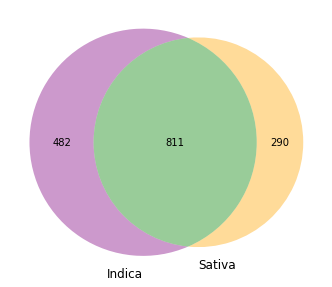

In [104]:
plt.figure(figsize=(10,5))
v= venn2(subsets=(len(df[df['type']==0]),len(df[df['type']==1]),len(df[df['type']==2])),set_labels=('Indica','Sativa'))
v.get_patch_by_id('01').set_color('orange')
v.get_patch_by_id('10').set_color('purple')
v.get_patch_by_id('11').set_alpha(0.4)
v.get_patch_by_id('11').set_color('green')
v.get_patch_by_id('01').set_edgecolor('none')
v.get_patch_by_id('10').set_edgecolor('none')
v.get_patch_by_id('11').set_edgecolor('none')

<Figure size 720x360 with 0 Axes>

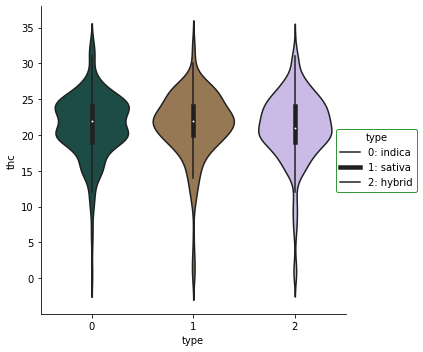

In [105]:
plt.figure(figsize=(10,5))
# my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m"}
b = sns.catplot(x='type',y='thc',kind='violin',data=df, palette='cubehelix')
b.fig.get_axes()[0].legend(title= 'type',loc='center right', bbox_to_anchor=(1.25,0.5),labels=["0: indica","1: sativa", '2: hybrid'],edgecolor='green',ncol=1)

<Figure size 720x360 with 0 Axes>

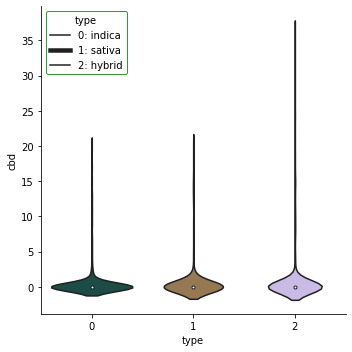

In [106]:
plt.figure(figsize=(10,5))
# my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m"}
a = sns.catplot(x='type',y='cbd',kind='violin',data=df, palette='cubehelix')
a.fig.get_axes()[0].legend(title= 'type',loc='upper left',labels=["0: indica","1: sativa", '2: hybrid'],edgecolor='green',ncol=1)
# a.set_axis_labels('indica','sativa','hybrid')

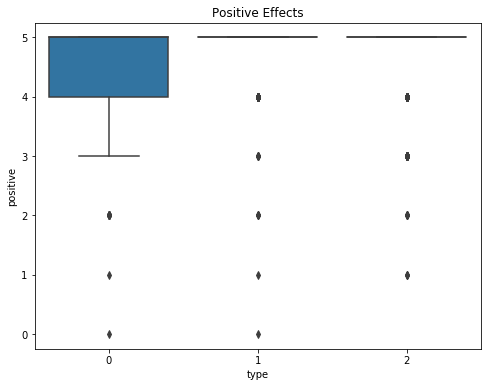

In [107]:
plt.figure(figsize=(8,6))
plt.title('Positive Effects')
sns.boxplot(x='type',y='positive',data=df)

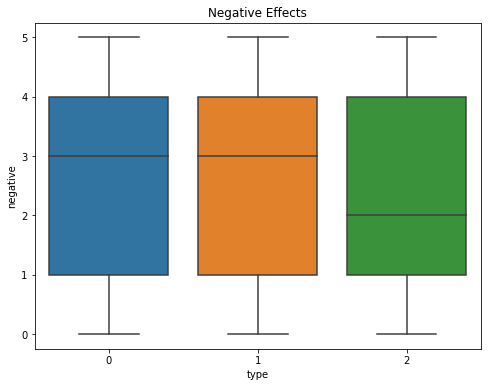

In [108]:
plt.figure(figsize=(8,6))
plt.title('Negative Effects')
sns.boxplot(x='type',y='negative',data=df)

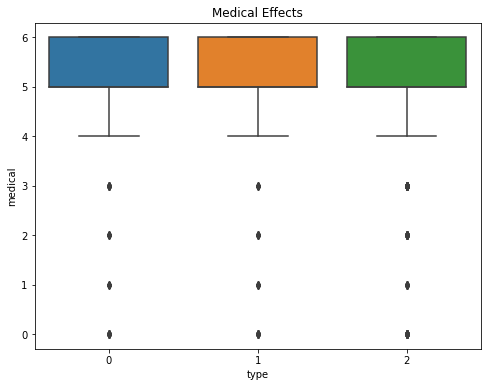

In [109]:
plt.figure(figsize=(8,6))
plt.title('Medical Effects')
sns.boxplot(x='type',y='medical',data=df)

Probability of Indica: 0.3044851547694251
Probability of Sativa: 0.1831964624131396
Probability of Hybrid: 0.5123183828174352


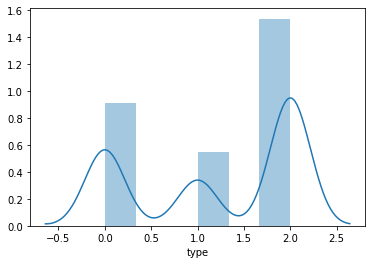

In [110]:
# class imbalance

indicadf=df[df['type']==0]
sativadf=df[df['type']==1]
hybriddf=df[df['type']==2]

sns.distplot(df['type'])
prind=len(indicadf)/len(df)
prsat=len(sativadf)/len(df)
prhyb=len(hybriddf)/len(df)
print('Probability of Indica: {}'.format(prind))
print('Probability of Sativa: {}'.format(prsat))
print('Probability of Hybrid: {}'.format(prhyb))

In [111]:
columns = list(df.keys())
columns

['type',
 'name',
 'Relaxed',
 'Hungry',
 'Happy',
 'Sleepy',
 'Dizzy',
 'Depression',
 'Insomnia',
 'Pain',
 'Stress',
 'Lack of Appetite',
 'Euphoric',
 'Creative',
 'Energetic',
 'Talkative',
 'Dry Mouth',
 'Nausea',
 'Headache',
 'Uplifted',
 'Tingly',
 'Paranoid',
 'Cramps',
 'Dry Eyes',
 'Fatigue',
 'Headaches',
 'Muscle Spasms',
 'Focused',
 'Eye Pressure',
 'Anxious',
 'Giggly',
 'Aroused',
 'Inflammation',
 'Spasticity',
 'Seizures',
 'positive',
 'negative',
 'medical',
 'None',
 'Earthy',
 'Sweet',
 'Citrus',
 'Flowery',
 'Violet',
 'Diesel',
 'Spicy/Herbal',
 'Sage',
 'Woody',
 'Apricot',
 'Grapefruit',
 'Orange',
 'Pungent',
 'Grape',
 'Pine',
 'Skunk',
 'Berry',
 'Pepper',
 'Menthol',
 'Blue',
 'Cheese',
 'Chemical',
 'Mango',
 'Lemon',
 'Peach',
 'Vanilla',
 'Nutty',
 'Chestnut',
 'Tea',
 'Tobacco',
 'Tropical',
 'Strawberry',
 'Blueberry',
 'Mint',
 'Apple',
 'Honey',
 'Lavender',
 'Lime',
 'Coffee',
 'Ammonia',
 'Minty',
 'Tree',
 'Fruit',
 'Butter',
 'Pineapple',
 'Ta

In [112]:
effects = columns[2:35]
tastes = columns[40:-2]

In [113]:
ta = pd.DataFrame(tastes)

In [114]:
import bokeh
from bokeh.plotting import output_file
from bokeh.io import show
from bokeh.sampledata.les_mis import data

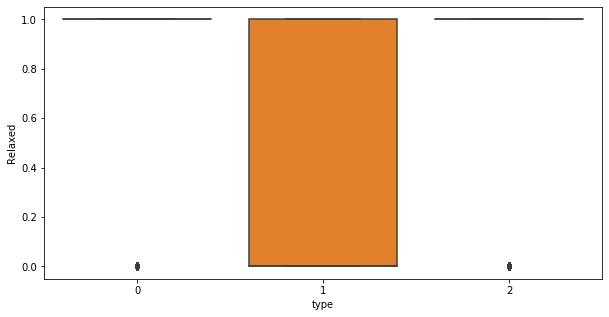

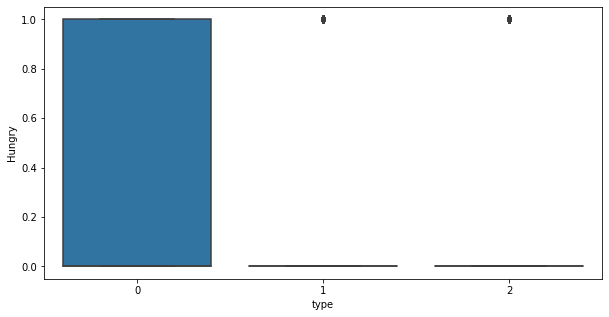

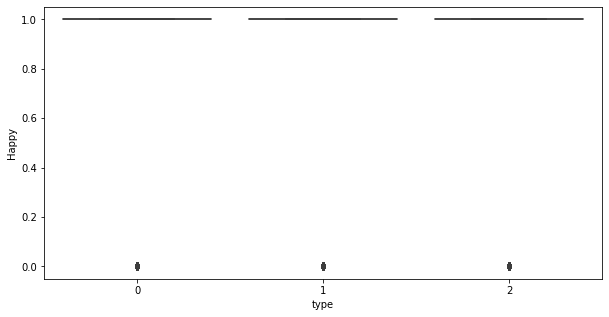

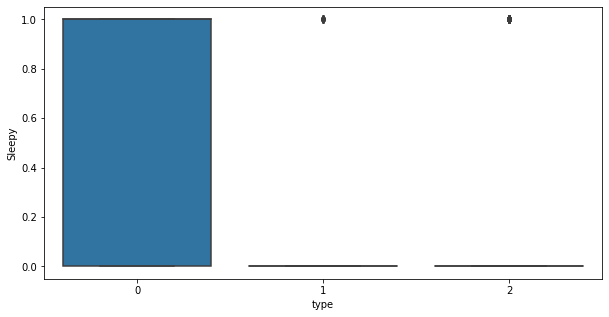

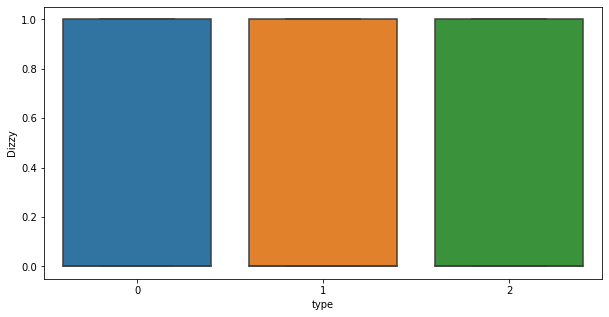

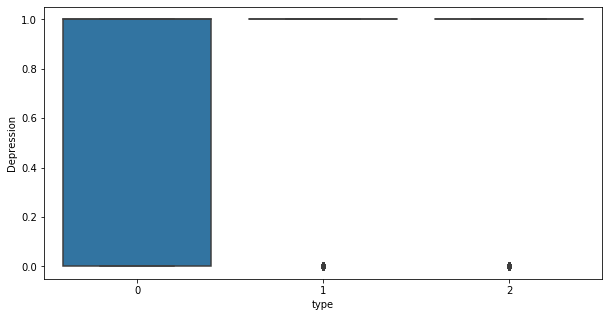

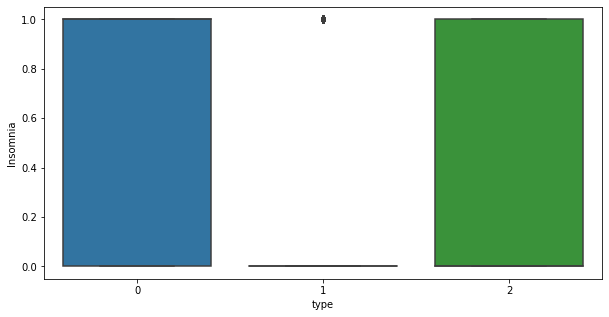

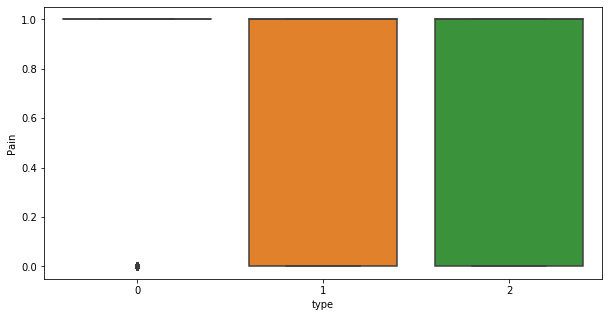

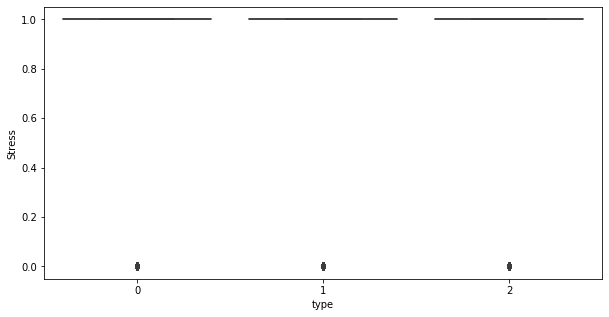

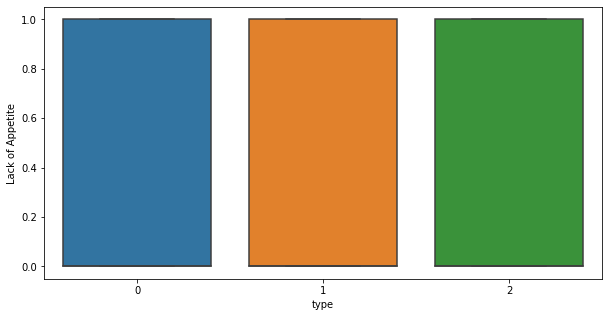

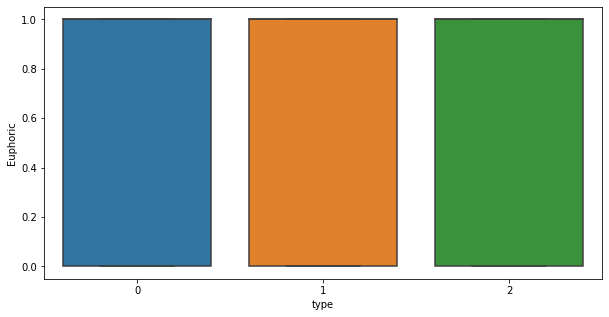

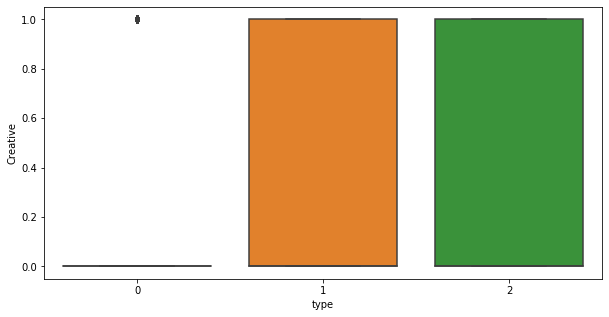

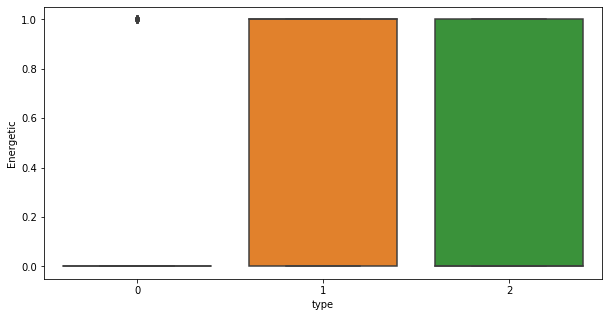

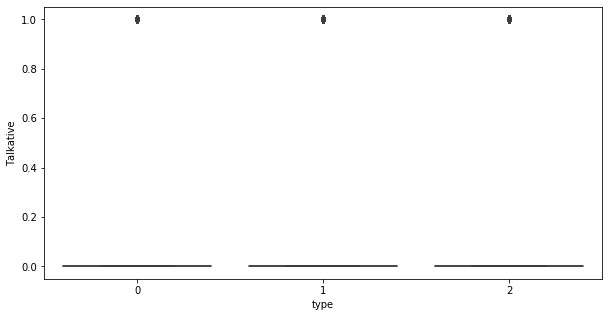

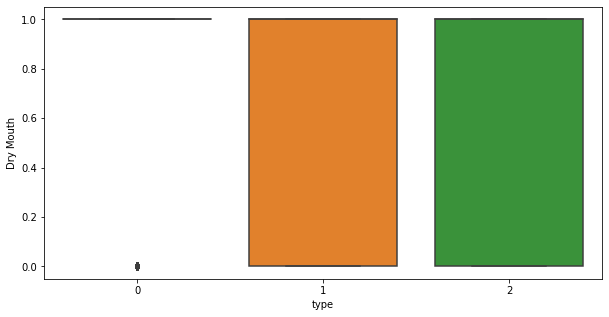

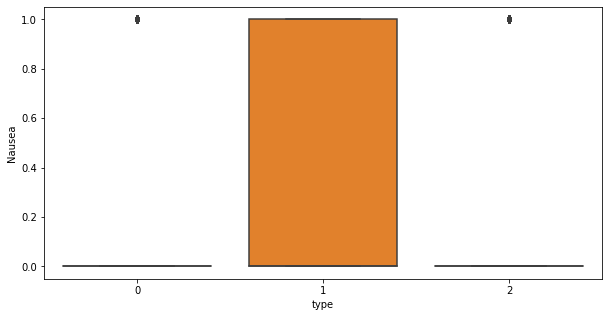

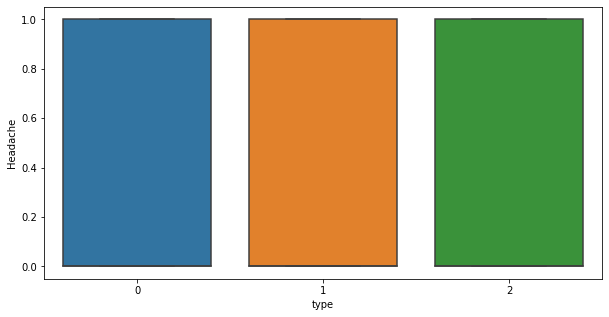

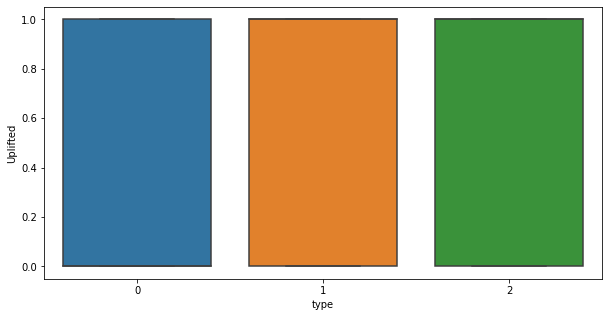

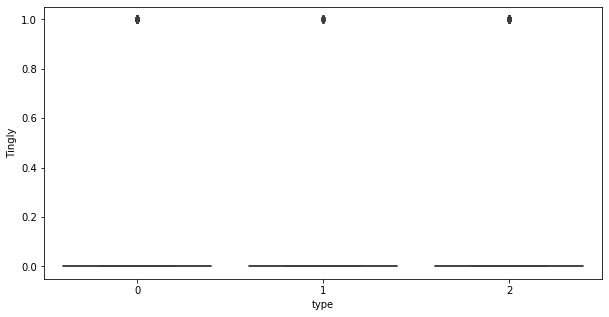

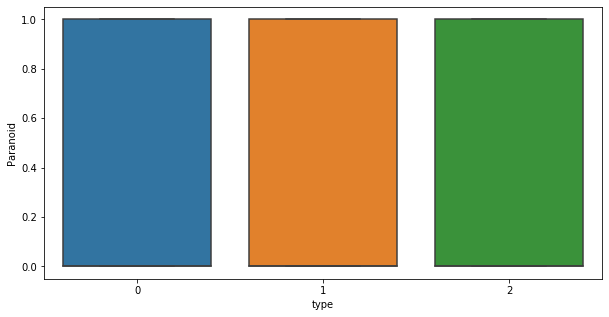

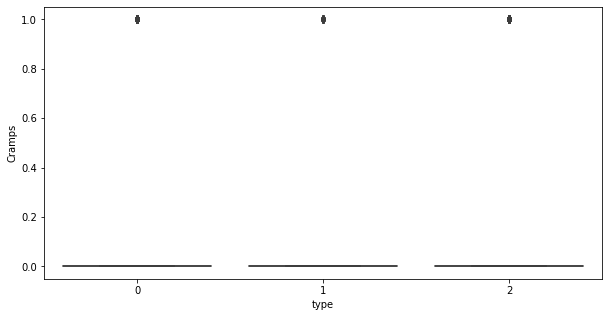

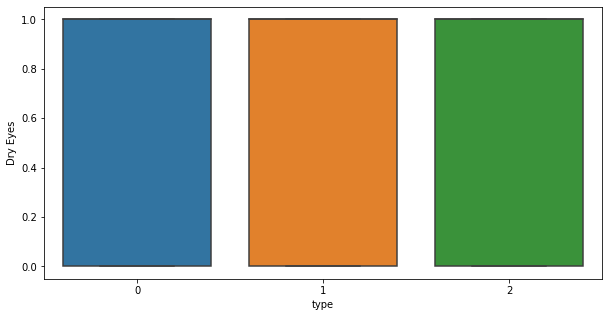

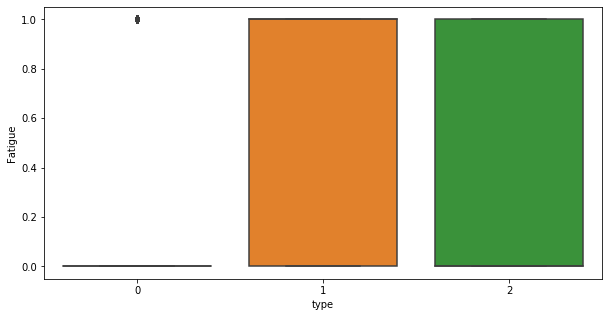

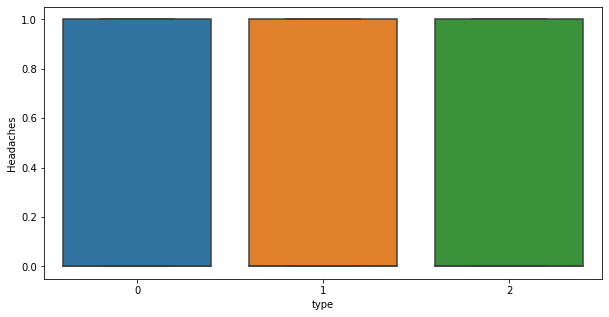

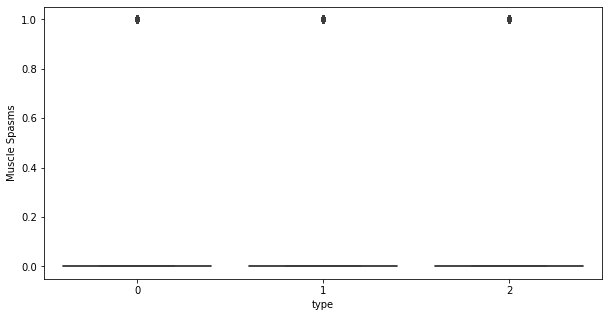

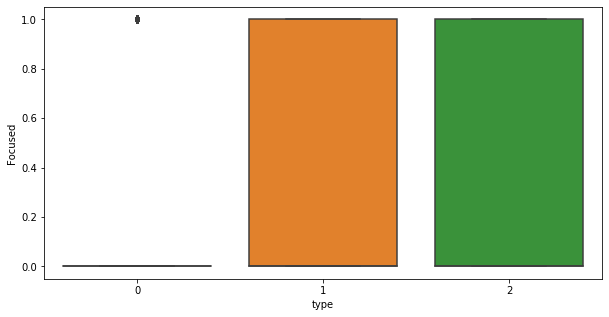

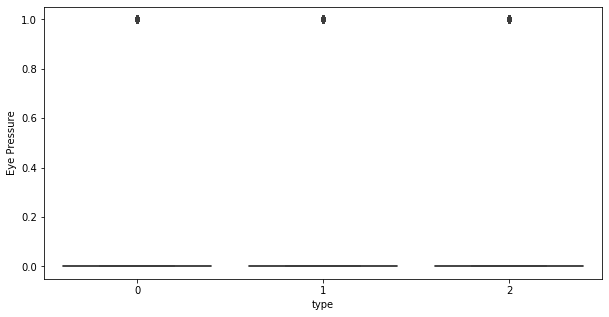

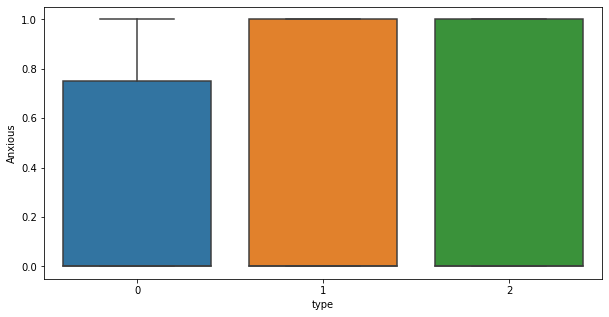

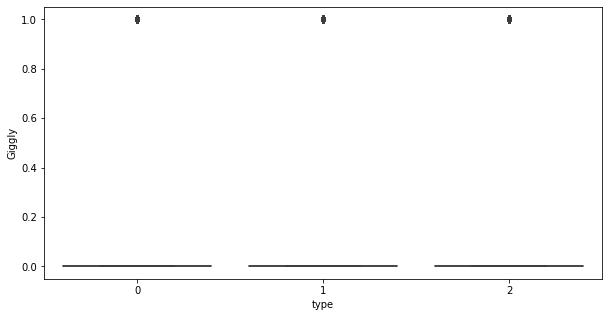

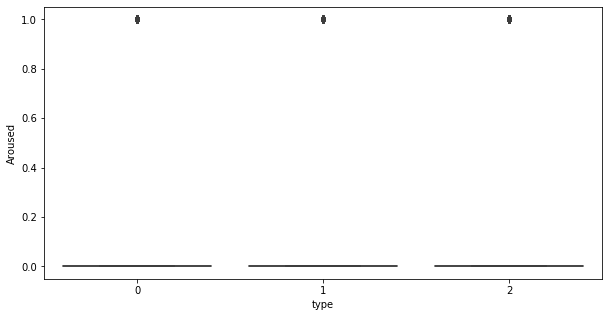

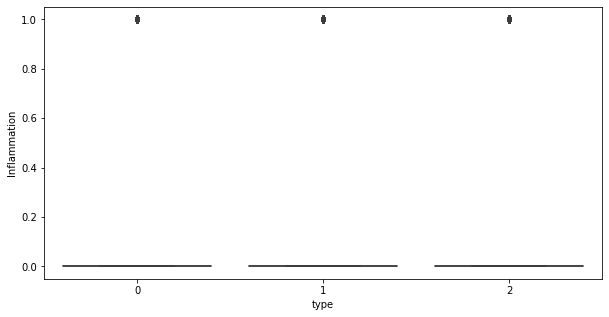

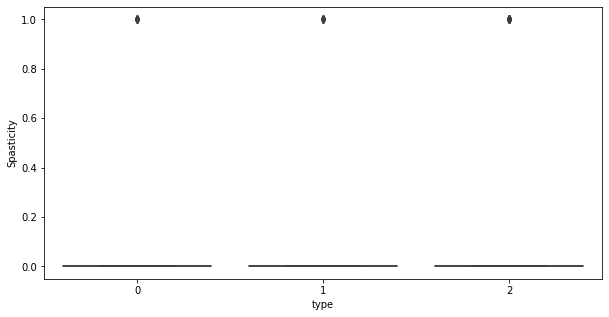

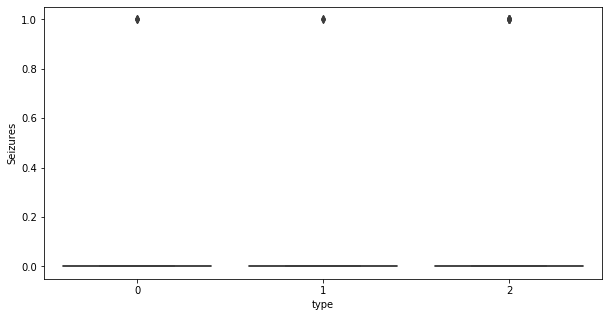

In [16]:
for e in effects:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='type',y=e,data=df)


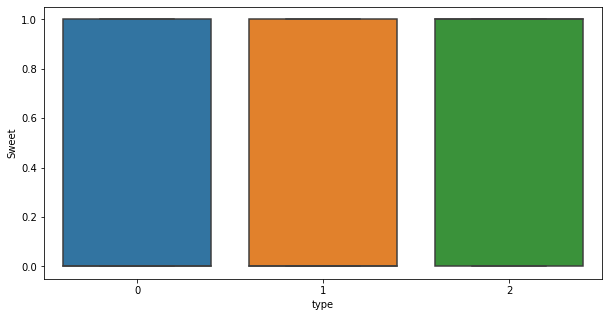

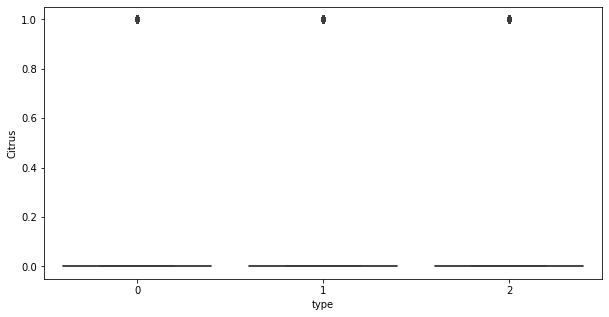

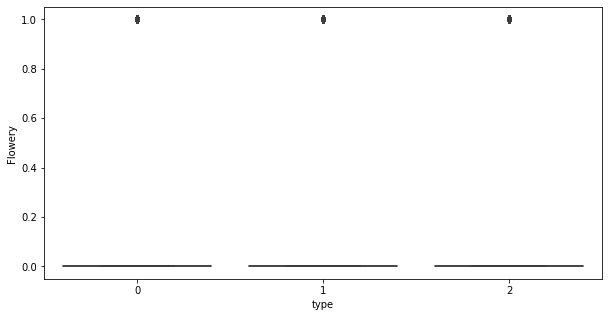

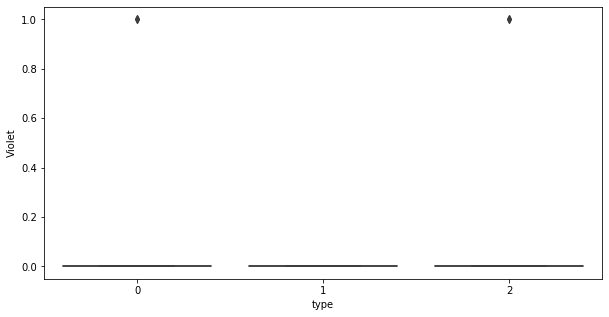

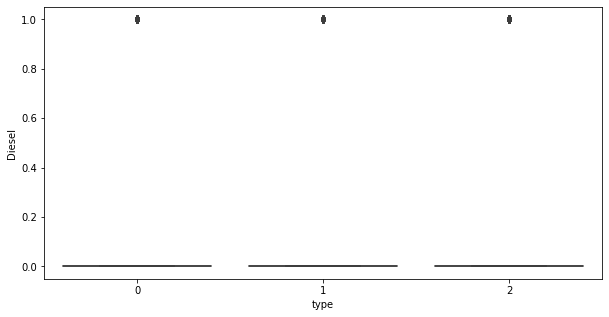

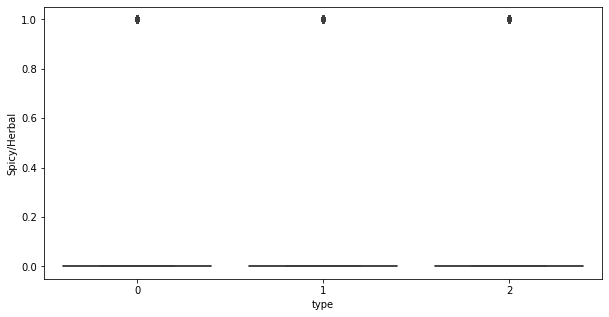

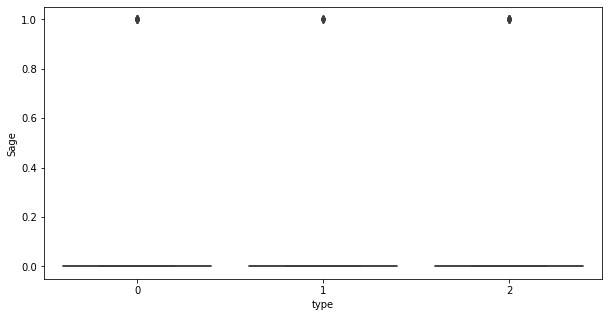

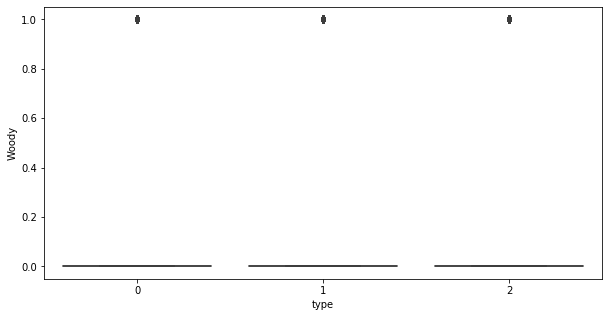

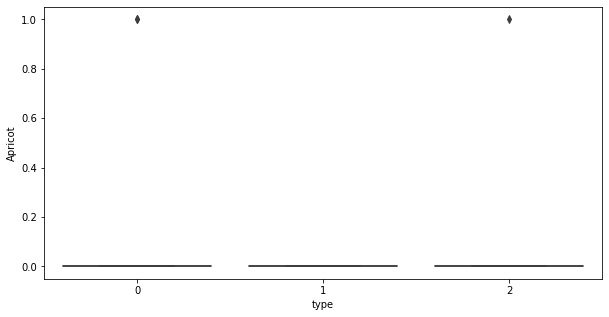

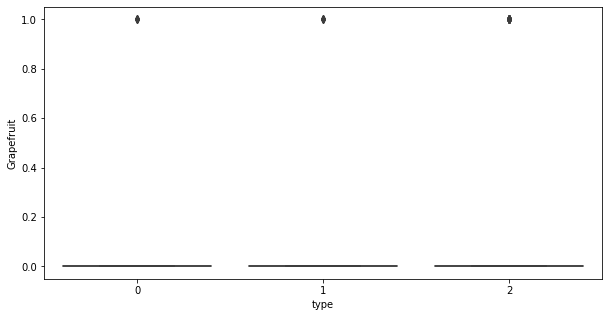

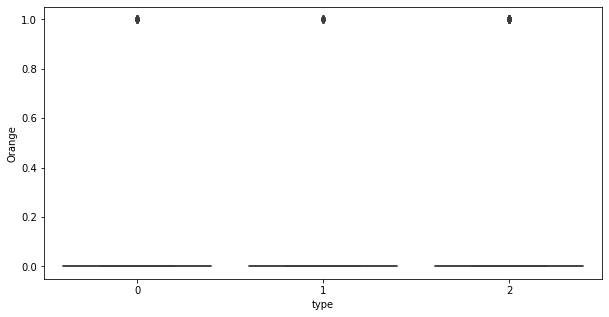

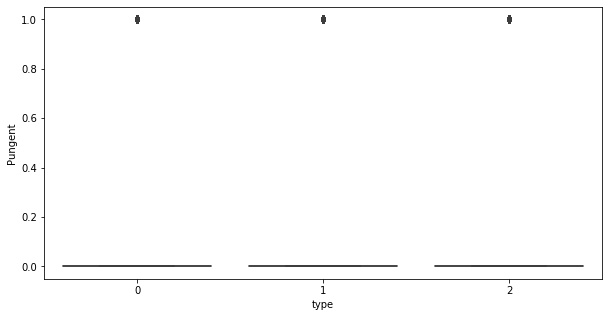

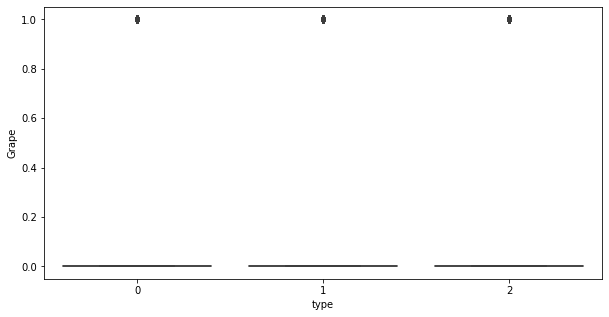

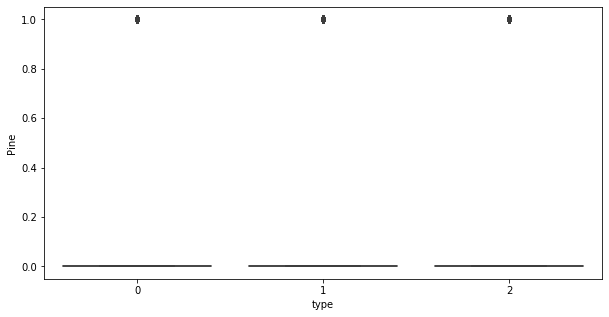

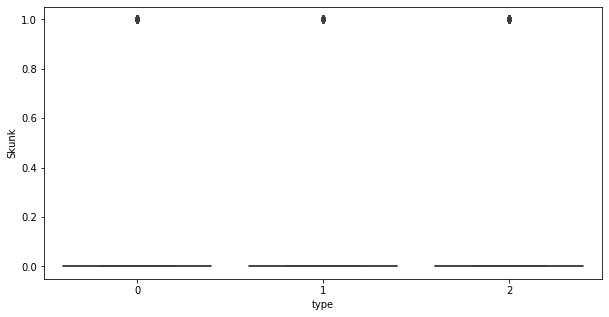

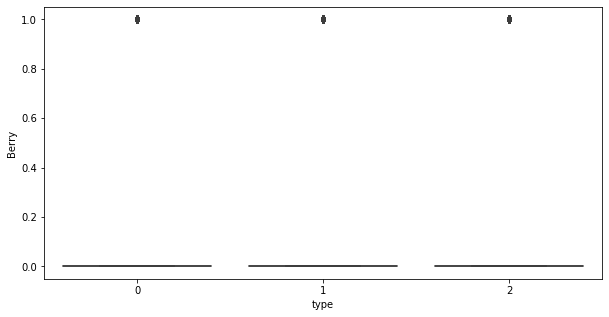

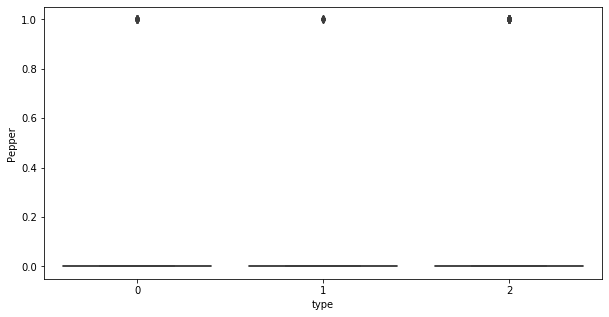

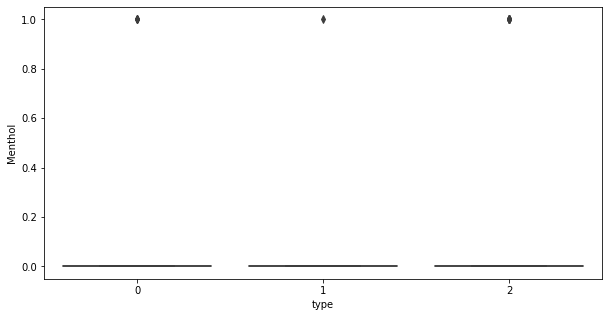

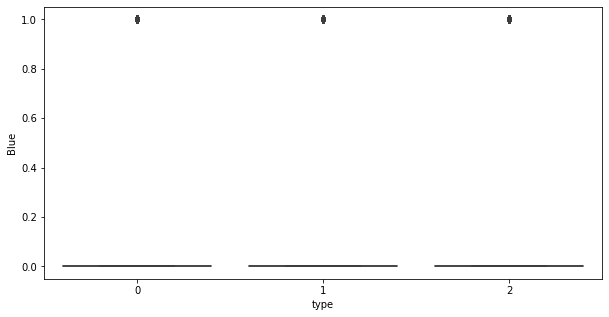

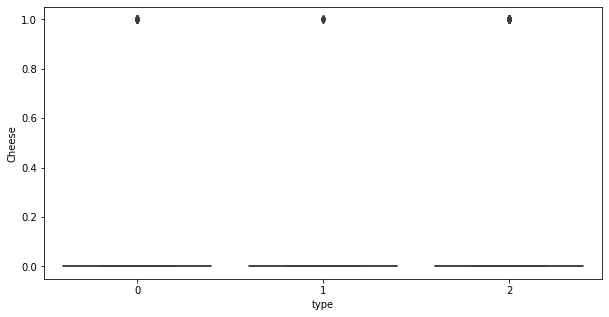

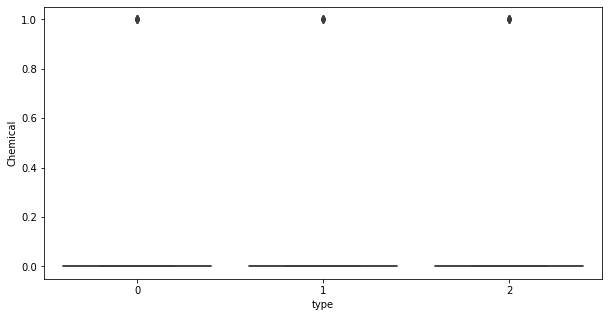

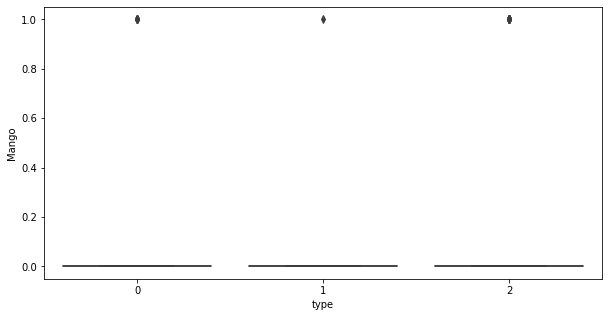

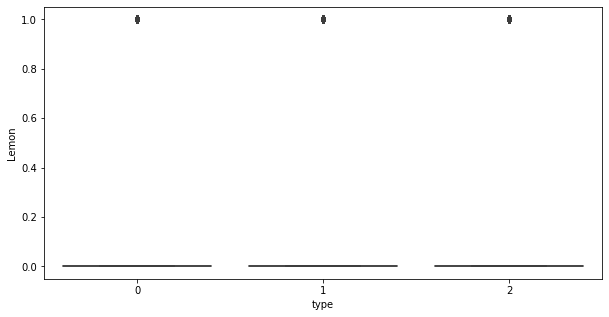

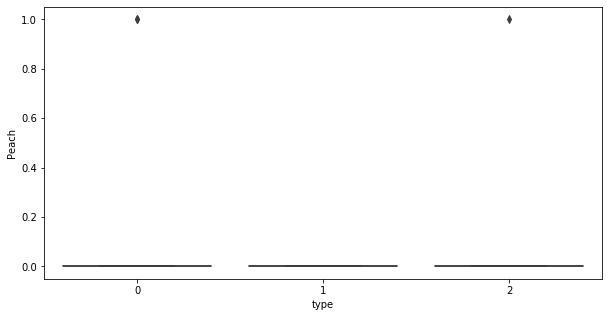

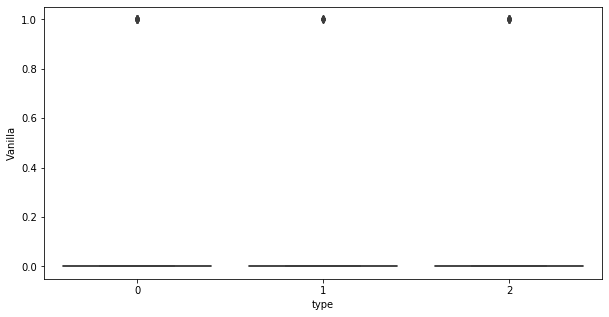

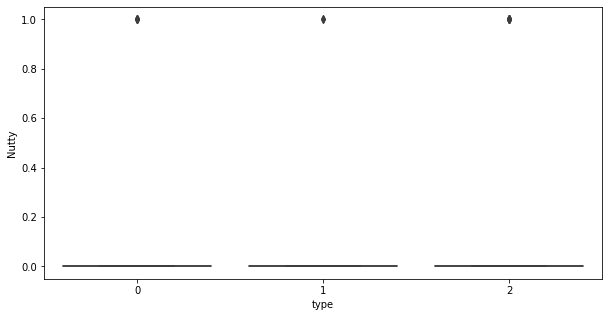

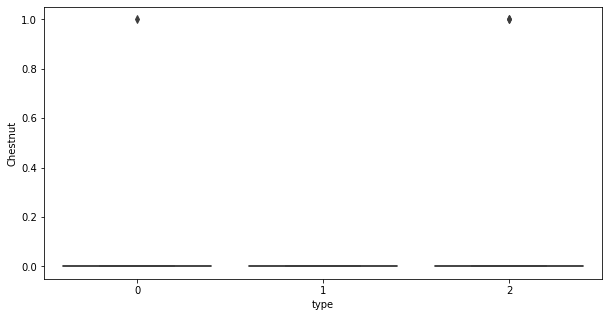

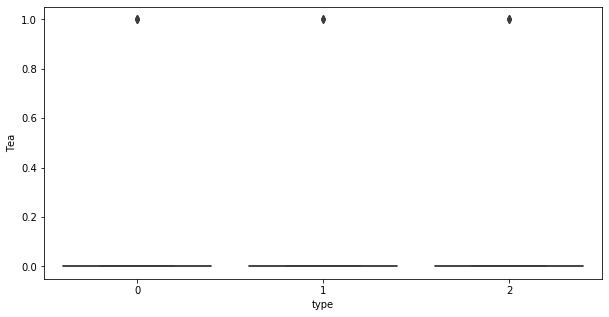

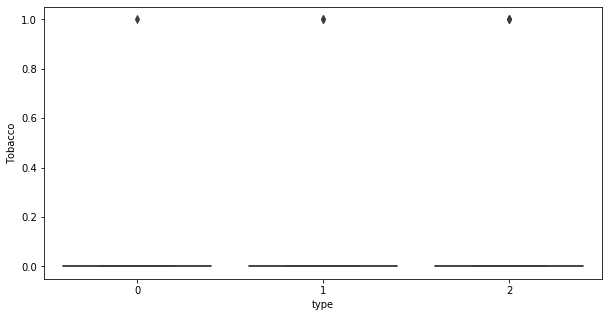

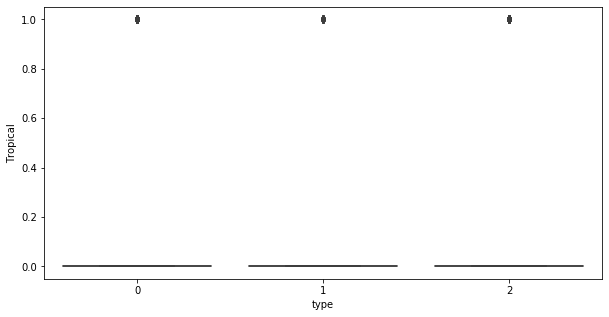

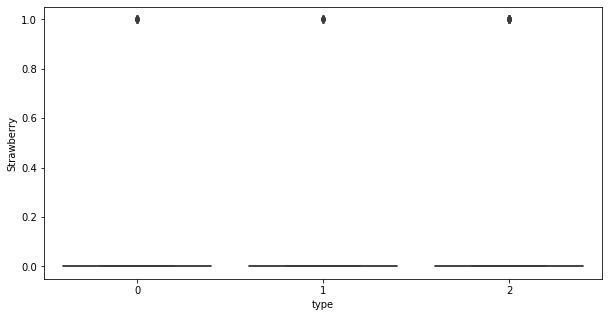

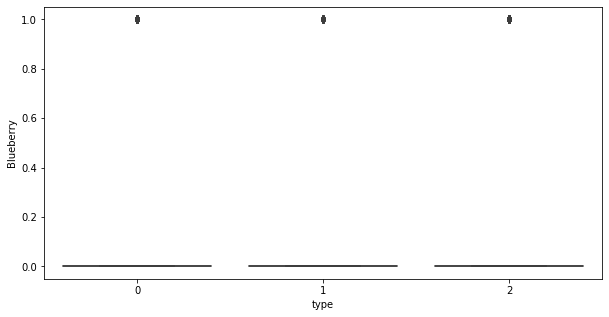

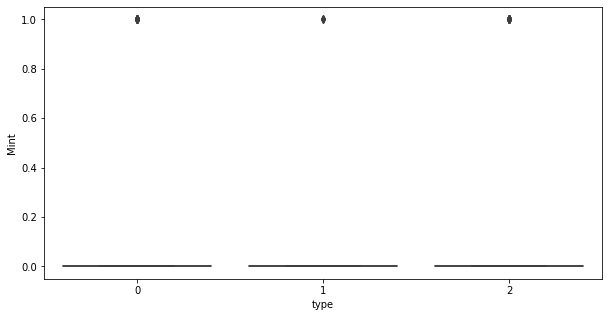

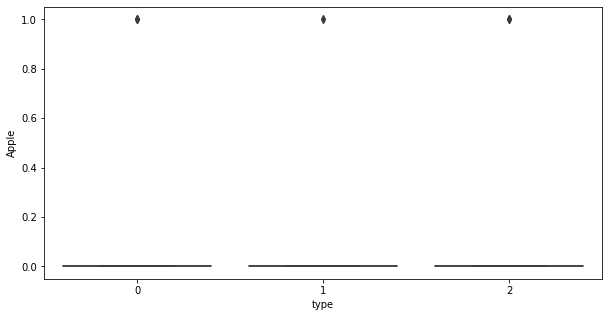

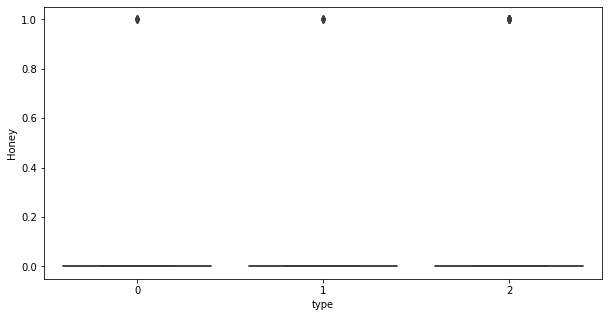

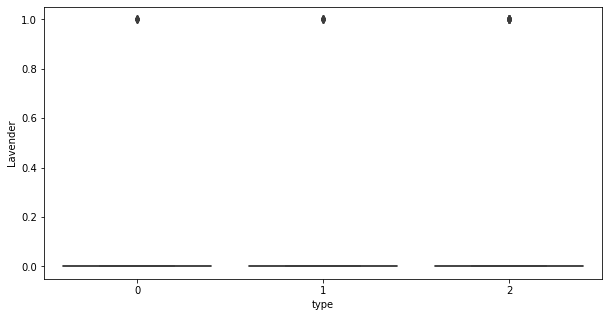

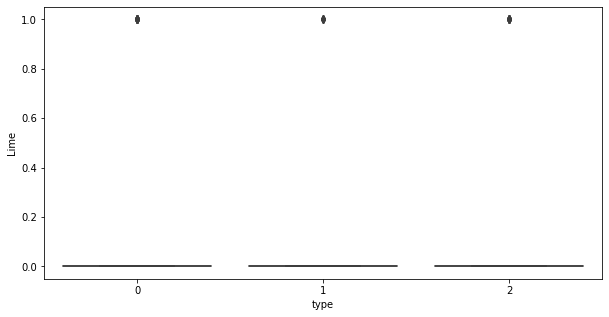

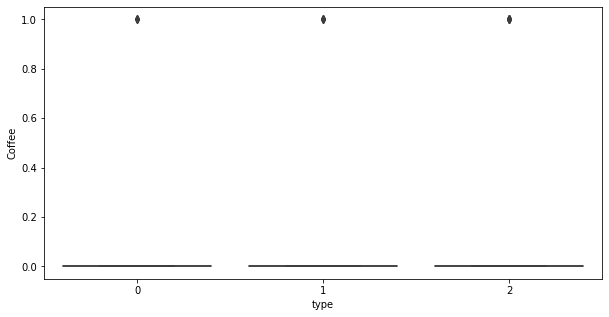

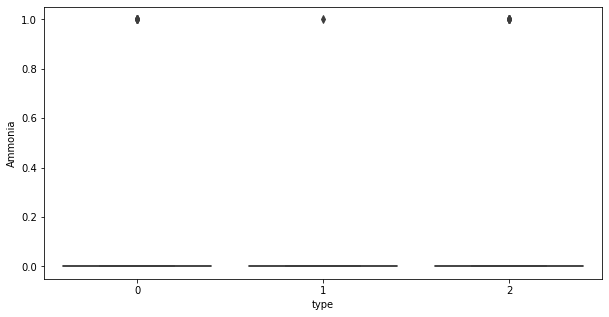

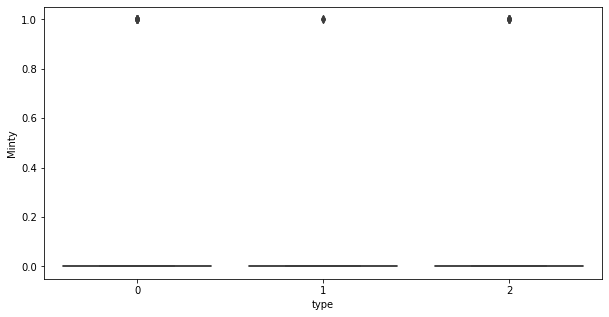

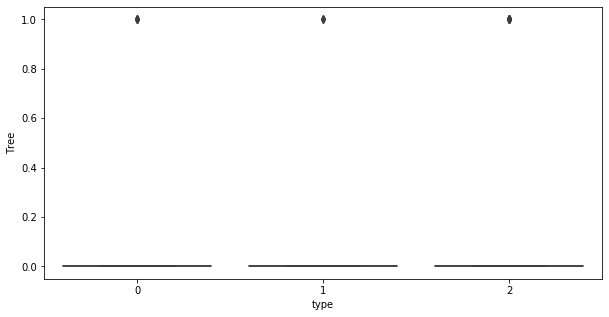

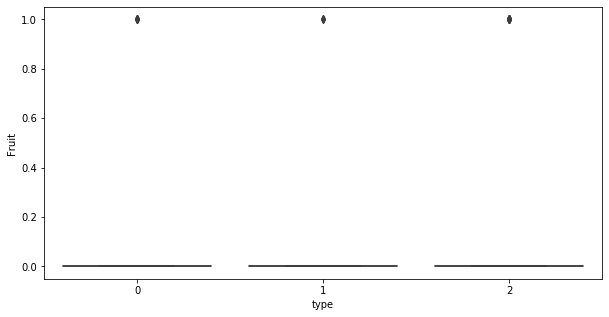

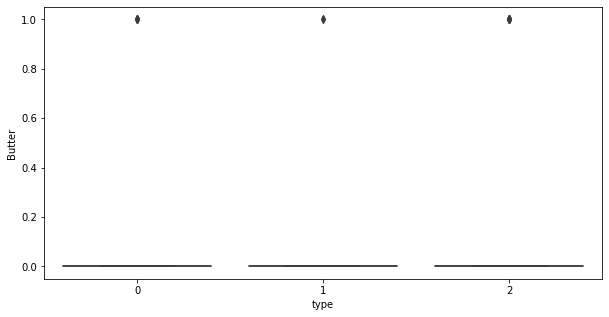

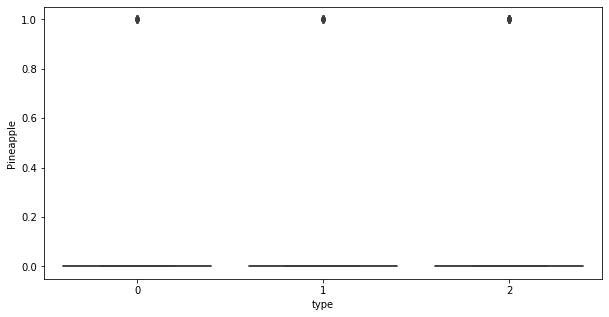

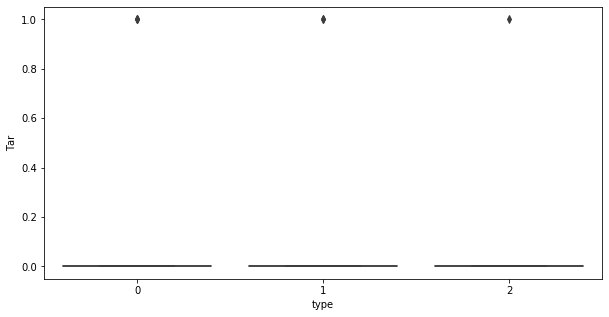

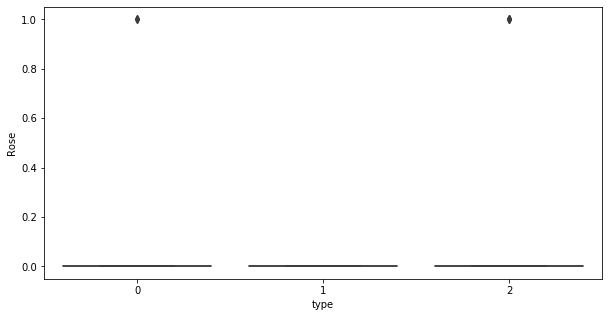

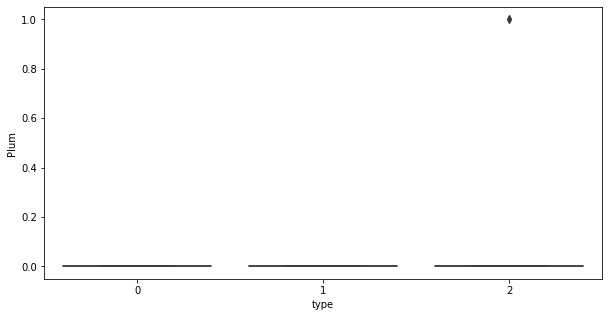

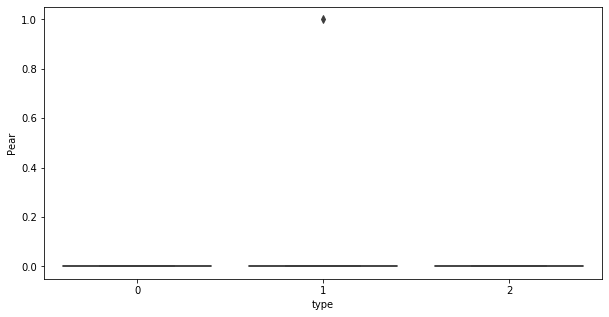

In [116]:
for t in tastes:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='type',y=t,data=df)

In [53]:
X_res.describe()

,Relaxed,Hungry,Happy,Sleepy,Dizzy,Depression,Insomnia,Pain,Stress,Lack of Appetite,Euphoric,Creative,Energetic,Talkative,Dry Mouth,Nausea,Headache,Uplifted,Tingly,Paranoid,Cramps,Dry Eyes,Fatigue,Headaches,Muscle Spasms,Focused,Eye Pressure,Anxious,Giggly,Aroused,Inflammation,Spasticity,Seizures,positive,negative,medical,None,Earthy,Sweet,Citrus,Flowery,Violet,Diesel,Spicy/Herbal,Sage,Woody,Apricot,Grapefruit,Orange,Pungent,Grape,Pine,Skunk,Berry,Pepper,Menthol,Blue,Cheese,Chemical,Mango,Lemon,Peach,Vanilla,Nutty,Chestnut,Tea,Tobacco,Tropical,Strawberry,Blueberry,Mint,Apple,Honey,Lavender,Lime,Coffee,Ammonia,Minty,Tree,Fruit,Butter,Pineapple,Tar,Rose,Plum,Pear,thc,cbd
count,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.0,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000,2433.000000
mean,0.693794,0.173859,0.816276,0.253185,0.389642,0.769831,0.399096,0.727908,0.844636,0.300041,0.656391,0.307028,0.302507,0.077682,0.712700,0.170571,0.259762,0.542540,0.062474,0.360049,0.062885,0.591040,0.343609,0.244554,0.134813,0.221537,0.065762,0.250308,0.099466,0.055487,0.147143,0.011097,0.006165,4.702836,2.374435,4.915331,0.0,0.460748,0.430744,0.185779,0.080148,0.001644,0.068640,0.076038,0.011508,0.084258,0.001233,0.011097,0.023428,0.138512,0.059186,0.110152,0.055076,0.139745,0.017674,0.005754,0.063707,0.021373,0.010275,0.010686,0.067406,0.001233,0.010686,0.007398,0.001233,0.004932,0.002466,0.051788,0.016030,0.061652,0.015208,0.004110,0.009864,0.011097,0.016441,0.006987,0.008220,0.011508,0.008220,0.008220,0.007398,0.015619,0.002466,0.003288,0.000822,0.000411,21.230991,0.607069
std,0.461011,0.379066,0.387338,0.434926,0.487769,0.421027,0.489813,0.445129,0.362326,0.458370,0.475010,0.461356,0.459438,0.267725,0.452596,0.376211,0.438594,0.498289,0.242065,0.480113,0.242806,0.491743,0.475010,0.429911,0.341594,0.415367,0.247917,0.433280,0.299348,0.228976,0.354322,0.104780,0.078293,0.645757,1.703070,1.208957,0.0,0.498559,0.495282,0.389008,0.271578,0.040522,0.252892,0.265113,0.106680,0.277832,0.035100,0.104780,0.151289,0.345508,0.236021,0.313144,0.228176,0.346794,0.131789,0.075654,0.244281,0.144653,0.100866,0.102842,0.250776,0.035100,0.102842,0.085712,0.035100,0.070070,0.049609,0.221644,0.125615,0.240572,0.122403,0.063992,0.098849,0.104780,0.127189,0.083314,0.090311,0.106680,0.090311,0.090311,0.085712,0.124020,0.049609,0.057260,0.028665,0.020274,4.634777,2.801136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

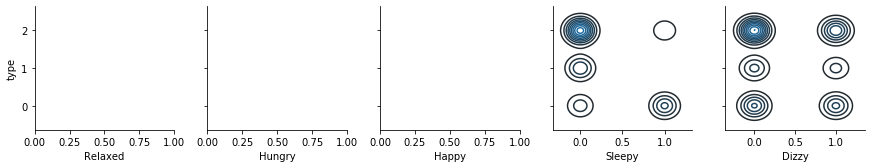

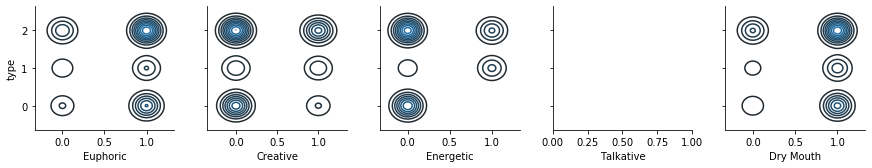

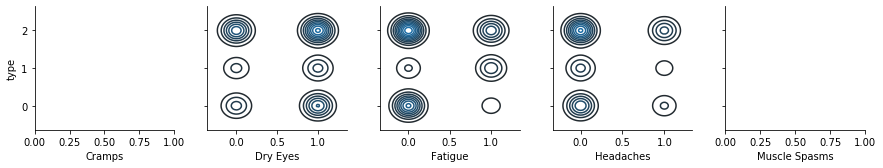

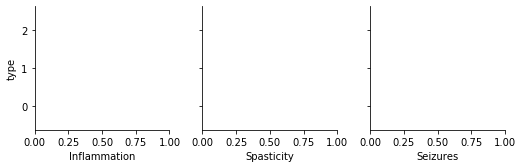

In [17]:
for i in range(0, 40, 10):
    g = sns.PairGrid(df,
                     x_vars = effects[i:i+5],
                     y_vars = ['type'])
    g = g.map(sns.kdeplot)

In [23]:
from collections import Counter
from imblearn.over_sampling import SMOTE 

### Modeling Functions

In [144]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score 
from sklearn.metrics import auc, confusion_matrix, f1_score, roc_curve

In [145]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        if accuracy > best_score:
            best_k = k
            best_score = accuracy
    print("Best Value for k: {}".format(best_k))
    print("Accuracy: {}".format(best_score))

In [146]:
def print_metrics(test, preds):
    print("Precision Score: {}".format(precision_score(test, preds,average=None)))
    print("Recall Score: {}".format(recall_score(test, preds,average=None)))
    print("Accuracy Score: {}".format(accuracy_score(test, preds)))
    print("F1 Score: {}".format(f1_score(test, preds,average=None)))

In [147]:
def roc(classifier, X_train, X_test, y_train, y_test, n_classes):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    y_score=classifier.fit(X_train, y_train).predict(X_test)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = ['blue', 'red', 'green']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

In [148]:
def plot_feature_importances(model,X_train, X_test, y_train, y_test):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [149]:
def plot_corr_matrix(y_true,y_pred,classes,normalize=False,title=None,cmap=plt.cm.YlGn):
    #labels=['Sativa','Indica','Hybrid']
    cmat=pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
    print(cmat)
    cm=confusion_matrix(y_true,y_pred)
    fig, ax =plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

### Implementation

In [150]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_curve
from sklearn.metrics import auc, classification_report, confusion_matrix
from sklearn import tree, svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.externals.six import StringIO 
# import xgboost as xgb
from sklearn.dummy import DummyClassifier
from sklearn.decomposition import PCA  
from sklearn.linear_model import LogisticRegression

In [151]:
#Train Test Split
features=df.drop(columns=['name','type'])
trainn=df.drop(columns=['name'])
selectedfeatures=['thc','cbd','Relaxed','Hungry','Sleepy','Depression','Insomnia','Pain','Euphoric','Creative','Energetic','Dry Mouth','Nausea','Uplifted','Fatigue','Focused',
                  'Sweet','Citrus','Flowery','Violet','Diesel','Spicy/Herbal','Sage','Woody','Apricot','Grapefruit','Orange','Pungent','Grape',
                  'Pine','Skunk','Berry','Pepper','Menthol','Cheese','Chemical','Mango','Lemon','Peach','Vanilla','Nutty']
target=df.type

In [152]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(features, target)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 811, 2: 811, 1: 811})


In [153]:
newsh = y_res.to_frame()

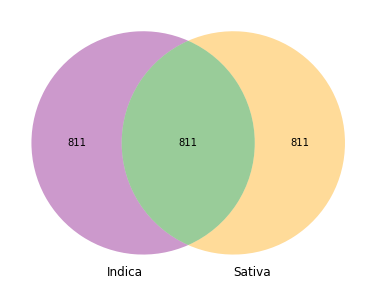

In [154]:
plt.figure(figsize=(10,5))
c = venn2(subsets=(len(newsh[newsh['type']==0]),len(newsh[newsh['type']==1]),len(newsh[newsh['type']==2])),set_labels=('Indica','Sativa'))
c.get_patch_by_id('01').set_color('orange')
c.get_patch_by_id('10').set_color('purple')
c.get_patch_by_id('11').set_alpha(0.4)
c.get_patch_by_id('11').set_color('green')
c.get_patch_by_id('01').set_edgecolor('none')
c.get_patch_by_id('10').set_edgecolor('none')
c.get_patch_by_id('11').set_edgecolor('none')

Probability of Indica: 0.3333333333333333
Probability of Sativa: 0.3333333333333333
Probability of Hybrid: 0.3333333333333333


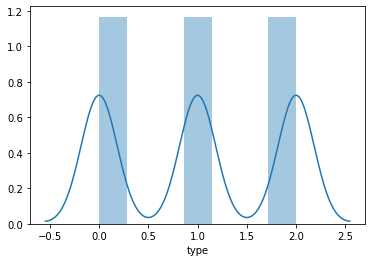

In [155]:
# class imbalance

indicadf=newsh[newsh['type']==0]
sativadf=newsh[newsh['type']==1]
hybriddf=newsh[newsh['type']==2]

sns.distplot(newsh['type'])
prind=len(indicadf)/len(newsh)
prsat=len(sativadf)/len(newsh)
prhyb=len(hybriddf)/len(newsh)
print('Probability of Indica: {}'.format(prind))
print('Probability of Sativa: {}'.format(prsat))
print('Probability of Hybrid: {}'.format(prhyb))

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.25,random_state=42)
trainx=X_train[selectedfeatures]
testx=X_test[selectedfeatures]

In [157]:
trainx.shape, y_train.shape, testx.shape, y_pred.shape, yptest.shape

((1824, 41), (1824,), (609, 41), (609,), (609,))

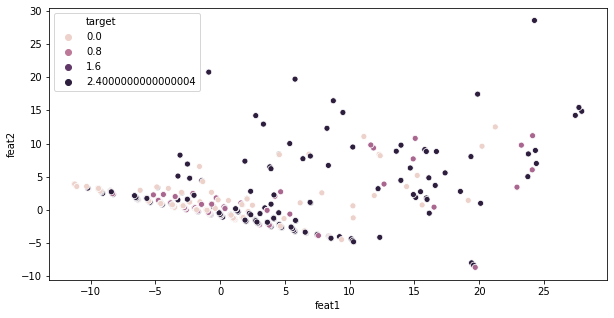

In [158]:
#PCA
pca = PCA()
features=df.drop(columns=['name'])
transformed = pca.fit_transform(X_res)
pca.components_
pcadict={'feat1':transformed[:,0],'feat2':transformed[:,1]}
pcadf=pd.DataFrame(pcadict)
pcadf['target']=df['type']
pcadf.head()
plt.figure(figsize=(10,5))
sns.scatterplot(x='feat1',y='feat2',hue='target',data=pcadf)

pca.mean_
featurespca=pcadf.drop(columns='target')
targetpca=pcadf.target
Xptrain, Xptest, yptrain, yptest = train_test_split(featurespca, targetpca, test_size=0.25,random_state=42)

In [159]:
#Scale Training Features
scaler = StandardScaler()

scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

Baseline Model Metrics:
Precision Score: [0.         0.32183908 0.        ]
Recall Score: [0. 1. 0.]
Accuracy Score: 0.3218390804597701
F1 Score: [0.         0.48695652 0.        ]
Predicted    1  All
True               
0          200  200
1          196  196
2          213  213
All        609  609
              precision    recall  f1-score   support

      indica       0.00      0.00      0.00       200
      sativa       0.32      1.00      0.49       196
      hybrid       0.00      0.00      0.00       213

    accuracy                           0.32       609
   macro avg       0.11      0.33      0.16       609
weighted avg       0.10      0.32      0.16       609



<Figure size 720x432 with 0 Axes>

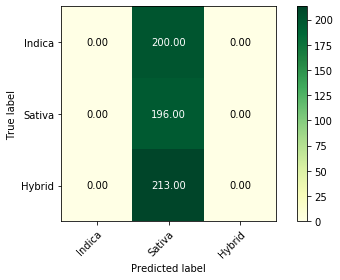

In [160]:
#Dummy Model (accuracy: 0.3218)
dummy = DummyClassifier(strategy='most_frequent', random_state=1)

dummy.fit(scaled_data_train, y_train)
basepreds=dummy.predict(scaled_data_test)
sc=dummy.score(scaled_data_test, y_test) 
print("Baseline Model Metrics:")
print_metrics(y_test,basepreds)
plt.figure(figsize=(10,6))
plot_corr_matrix(y_test,basepreds,['Indica','Sativa','Hybrid'],'Baseline')
print(classification_report(y_test,basepreds,target_names=['indica','sativa','hybrid']))


Precision Score: [0.72772277 0.87209302 0.64680851]
Recall Score: [0.735      0.76530612 0.71361502]
Accuracy Score: 0.7372742200328407
F1 Score: [0.73134328 0.81521739 0.67857143]
Predicted    0    1    2  All
True                         
0          147    8   45  200
1            8  150   38  196
2           47   14  152  213
All        202  172  235  609
              precision    recall  f1-score   support

      indica       0.73      0.73      0.73       200
      sativa       0.87      0.77      0.82       196
      hybrid       0.65      0.71      0.68       213

    accuracy                           0.74       609
   macro avg       0.75      0.74      0.74       609
weighted avg       0.75      0.74      0.74       609



<Figure size 720x432 with 0 Axes>

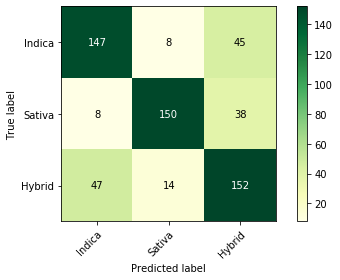

In [161]:
#Logistic Regression Baseline(Accuracy: 0.7373)
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_log = logreg.fit(scaled_data_train, y_train)
y_pred=model_log.predict(scaled_data_test)
print_metrics(y_test,y_pred)
plt.figure(figsize=(10,6))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])
print(classification_report(y_test,y_pred,target_names=['indica','sativa','hybrid']))

Precision Score: [0.70892019 0.76410256 0.64179104]
Recall Score: [0.755      0.76020408 0.6056338 ]
Accuracy Score: 0.7044334975369458
F1 Score: [0.73123487 0.76214834 0.62318841]
Predicted    0    1    2  All
True                         
0          151   13   36  200
1           11  149   36  196
2           51   33  129  213
All        213  195  201  609
              precision    recall  f1-score   support

      indica       0.71      0.76      0.73       200
      sativa       0.76      0.76      0.76       196
      hybrid       0.64      0.61      0.62       213

    accuracy                           0.70       609
   macro avg       0.70      0.71      0.71       609
weighted avg       0.70      0.70      0.70       609



<Figure size 720x432 with 0 Axes>

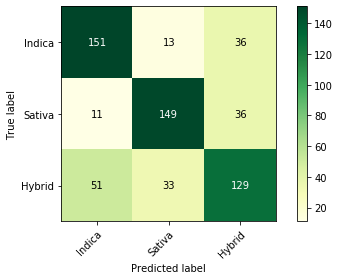

In [171]:
#Logistic Regression With Selected Features (accuracy: 0.70)
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_log = logreg.fit(trainx, y_train)
y_pred=model_log.predict(testx)
print_metrics(y_test,y_pred)
plt.figure(figsize=(10,6))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])
print(classification_report(y_test,y_pred,target_names=['indica','sativa','hybrid']))

In [163]:
#Logistic Regression with PCA (Accuracy: 0.5253)
logreg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_log = logreg.fit(Xptrain, yptrain)
y_pred=model_log.predict(Xptest)
print_metrics(yptest,y_pred)
plt.figure(figsize=(10,6))
plot_corr_matrix(yptest,y_pred,['Indica','Sativa','Hybrid'])
print(classification_report(yptest,y_pred,target_names=['indica','sativa','hybrid']))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Precision Score: [0.57751938 0.68774704 0.66326531]
Recall Score: [0.745      0.8877551  0.30516432]
Accuracy Score: 0.6371100164203612
F1 Score: [0.65065502 0.77505568 0.41800643]
              precision    recall  f1-score   support

      indica       0.58      0.74      0.65       200
      sativa       0.69      0.89      0.78       196
      hybrid       0.66      0.31      0.42       213

    accuracy                           0.64       609
   macro avg       0.64      0.65      0.61       609
weighted avg       0.64      0.64      0.61       609

Predicted    0    1   2  All
True                        
0          149   27  24  200
1           13  174   9  196
2           96   52  65  213
All        258  253  98  609


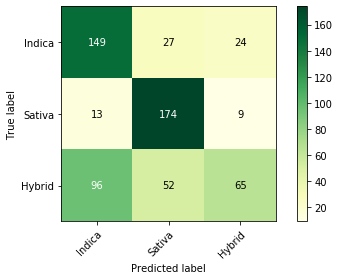

In [164]:
#KNN Baseline (Accuracy: 0.6371)
clf1 = KNeighborsClassifier()
clf1.fit(scaled_data_train, y_train)
test_preds = clf1.predict(scaled_data_test)
print_metrics(y_test, test_preds)
print(classification_report(y_test,test_preds,target_names=['indica','sativa','hybrid']))
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])

Precision Score: [0.65637066 0.64157706 0.71830986]
Recall Score: [0.85       0.91326531 0.23943662]
Accuracy Score: 0.6568144499178982
F1 Score: [0.74074074 0.75368421 0.35915493]
              precision    recall  f1-score   support

      indica       0.66      0.85      0.74       200
      sativa       0.64      0.91      0.75       196
      hybrid       0.72      0.24      0.36       213

    accuracy                           0.66       609
   macro avg       0.67      0.67      0.62       609
weighted avg       0.67      0.66      0.61       609

Predicted    0    1   2  All
True                        
0          170   19  11  200
1            8  179   9  196
2           81   81  51  213
All        259  279  71  609


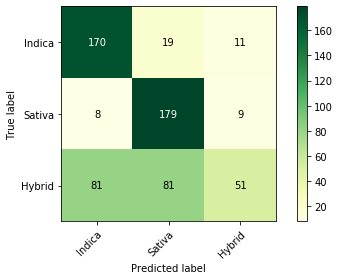

In [165]:
#KNN With Selected Features (Accuracy: 0.6568)
clf1 = KNeighborsClassifier()
clf1.fit(trainx, y_train)
test_preds = clf1.predict(testx)
print_metrics(y_test, test_preds)
print(classification_report(y_test,test_preds,target_names=['indica','sativa','hybrid']))
confusion_matrix(test_preds,y_test)
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])


In [166]:
#KNN With PCA (Accuracy: 0.64)
clf1 = KNeighborsClassifier()
clf1.fit(Xptrain, yptrain)
test_preds = clf1.predict(Xptest)
print_metrics(yptest, test_preds)
print(classification_report(yptest,test_preds,target_names=['indica','sativa','hybrid']))
confusion_matrix(test_preds,yptest)
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Best Value for k: 1
Accuracy: 0.6600985221674877
Precision Score: [0.6        0.59602649 0.63829787]
Recall Score: [0.78       0.91836735 0.14084507]
Accuracy Score: 0.6009852216748769
F1 Score: [0.67826087 0.72289157 0.23076923]
              precision    recall  f1-score   support

      indica       0.60      0.78      0.68       200
      sativa       0.60      0.92      0.72       196
      hybrid       0.64      0.14      0.23       213

    accuracy                           0.60       609
   macro avg       0.61      0.61      0.54       609
weighted avg       0.61      0.60      0.54       609

Predicted    0    1   2  All
True                        
0          156   33  11  200
1           10  180   6  196
2           94   89  30  213
All        260  302  47  609


<Figure size 720x360 with 0 Axes>

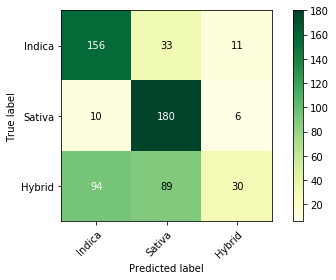

In [167]:
#Getting best KNN model (k=23, accuracy: 0.6010)
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)
clf1 = KNeighborsClassifier(n_neighbors=23)
clf1.fit(scaled_data_train, y_train)
test_preds = clf1.predict(scaled_data_test)
print_metrics(y_test, test_preds)
print(classification_report(y_test,test_preds,target_names=['indica','sativa','hybrid']))
plt.figure(figsize=(10,5))
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])

Best Value for k: 1
Accuracy: 0.6912972085385879
Precision Score: [0.68145161 0.69019608 0.71698113]
Recall Score: [0.845      0.89795918 0.35680751]
Accuracy Score: 0.6912972085385879
F1 Score: [0.75446429 0.7804878  0.47648903]
Mean Cross Validation Score: 68.15%
              precision    recall  f1-score   support

      indica       0.68      0.84      0.75       200
      sativa       0.69      0.90      0.78       196
      hybrid       0.72      0.36      0.48       213

    accuracy                           0.69       609
   macro avg       0.70      0.70      0.67       609
weighted avg       0.70      0.69      0.67       609

Predicted    0    1    2  All
True                         
0          169   15   16  200
1            6  176   14  196
2           73   64   76  213
All        248  255  106  609


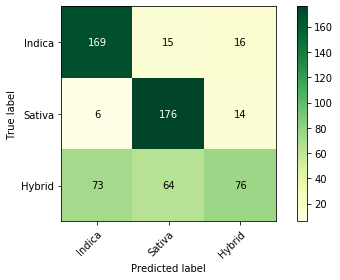

In [185]:
#Finding best k with selected features (k=40, accuracy: .6190)
find_best_k(trainx, y_train, testx, y_test)
clf1 = KNeighborsClassifier(n_neighbors=1)
clf1.fit(trainx, y_train)
test_preds = clf1.predict(testx)
print_metrics(y_test, test_preds)
dt_cv_score=cross_val_score(clf1, trainx, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
print(classification_report(y_test,test_preds,target_names=['indica','sativa','hybrid']))
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])

In [169]:
#Finding best k with PCA (k=1 accuracy: 0.66)
find_best_k(Xptrain, yptrain, Xptest, yptest)
clf1 = KNeighborsClassifier(n_neighbors=1)
clf1.fit(Xptrain, yptrain)
test_preds = clf1.predict(Xptest)
print_metrics(yptest, test_preds)
dt_cv_score=cross_val_score(clf1, Xptrain, yptrain)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
print(classification_report(yptest,test_preds,target_names=['indica','satica','hybrid']))
plot_corr_matrix(yptest,test_preds,['Indica','Sativa','Hybrid'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [172]:
#Grid Search for KNN (k=30, weights=uniform, accuracy: 0.5232)
model=KNeighborsClassifier()
dt_cv_score=cross_val_score(model, scaled_data_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))

dt_param_grid = {
    'n_neighbors':list(range(1,31)),
    'weights':['uniform','distance']
}

dt_grid_search = GridSearchCV(model, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(scaled_data_train, y_train.values)

Mean Cross Validation Score: 63.93%


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [142]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(testx, y_test)

ValueError: query data dimension must match training data dimension

Precision Score: [0.58695652 0.54545455 0.57337884]
Recall Score: [0.48648649 0.07792208 0.80769231]
Accuracy Score: 0.5757575757575758
F1 Score: [0.5320197  0.13636364 0.67065868]
Mean Cross Validation Score: 59.65%
              precision    recall  f1-score   support

      indica       0.59      0.49      0.53       111
      sativa       0.55      0.08      0.14        77
      hybrid       0.57      0.81      0.67       208

    accuracy                           0.58       396
   macro avg       0.57      0.46      0.45       396
weighted avg       0.57      0.58      0.53       396

Predicted   0   1    2  All
True                       
0          54   0   57  111
1           3   6   68   77
2          35   5  168  208
All        92  11  293  396


<Figure size 720x360 with 0 Axes>

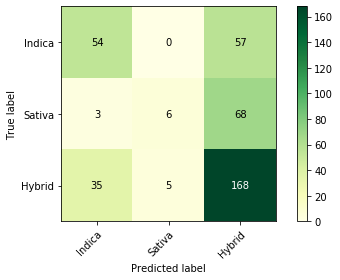

In [53]:
clf1 = KNeighborsClassifier(n_neighbors=30, weights='uniform')
clf1.fit(scaled_data_train, y_train)
test_preds = clf1.predict(scaled_data_test)
print_metrics(y_test, test_preds)
dt_cv_score=cross_val_score(clf1, scaled_data_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
print(classification_report(y_test,test_preds,target_names=['indica','sativa','hybrid']))
plt.figure(figsize=(10,5))
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])

In [65]:
#Grid Search for KNN with selected features (k=28, uniform, accuracy: 0.6628)
dt_cv_score=cross_val_score(model, trainx, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))

Mean Cross Validation Score: 55.1%


<Figure size 720x360 with 0 Axes>

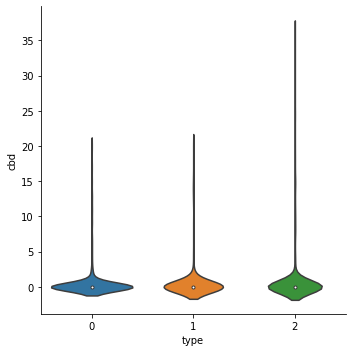

In [62]:
plt.figure(figsize=(10,5))
sns.catplot(x='type',y='cbd',kind='violin',data=df)

In [173]:
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(testx, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))

ValueError: query data dimension must match training data dimension

Best Parameter Combination Found During Grid Search:
Precision Score: [0.57983193 0.66666667 0.60869565]
Recall Score: [0.62162162 0.20779221 0.74038462]
Accuracy Score: 0.6035353535353535
F1 Score: [0.6        0.31683168 0.6681128 ]
Mean Cross Validation Score: 59.48%
              precision    recall  f1-score   support

      indica       0.58      0.62      0.60       111
      sativa       0.67      0.21      0.32        77
      hybrid       0.61      0.74      0.67       208

    accuracy                           0.60       396
   macro avg       0.62      0.52      0.53       396
weighted avg       0.61      0.60      0.58       396

Predicted    0   1    2  All
True                        
0           69   0   42  111
1            4  16   57   77
2           46   8  154  208
All        119  24  253  396


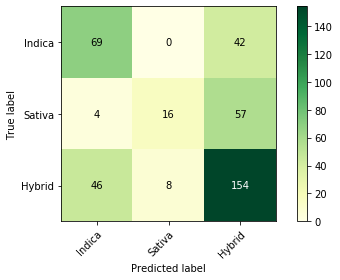

In [77]:
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_
clf1 = KNeighborsClassifier(n_neighbors=28, weights='uniform')
clf1.fit(trainx, y_train)
test_preds = clf1.predict(testx)
print_metrics(y_test, test_preds)
dt_cv_score=cross_val_score(clf1, trainx, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
print(classification_report(y_test,test_preds,target_names=['indica','sativa','hybrid']))
plot_corr_matrix(y_test,test_preds,['Indica','Sativa','Hybrid'])

Mean Cross Validation Score: 60.15%
Mean Training Score: 83.87%
Mean Testing Score: 65.4%
Best Parameter Combination Found During Grid Search:
Precision Score: [0.71428571 0.27906977 0.67843137]
Recall Score: [0.63063063 0.15584416 0.83173077]
Accuracy Score: 0.6439393939393939
F1 Score: [0.66985646 0.2        0.74730022]
Mean Cross Validation Score: 63.94%
              precision    recall  f1-score   support

      indica       0.71      0.63      0.67       111
      satica       0.28      0.16      0.20        77
      hybrid       0.68      0.83      0.75       208

    accuracy                           0.64       396
   macro avg       0.56      0.54      0.54       396
weighted avg       0.61      0.64      0.62       396

Predicted   0   1    2  All
True                       
0          70  14   27  111
1          10  12   55   77
2          18  17  173  208
All        98  43  255  396


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


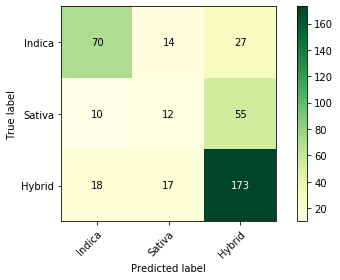

In [78]:
#Grid search with PCA(k=28,distance, accuracy: 0.5378)
dt_cv_score=cross_val_score(model, Xptrain, yptrain)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))

dt_param_grid = {
    'n_neighbors':list(range(1,31)),
    'weights':['uniform','distance']
}

dt_grid_search = GridSearchCV(model, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(Xptrain, yptrain)

dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(Xptest, yptest)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_
clf1 = KNeighborsClassifier(n_neighbors=10,weights='distance')
clf1.fit(Xptrain, yptrain)
test_preds = clf1.predict(Xptest)
print_metrics(yptest, test_preds)
dt_cv_score=cross_val_score(clf1, Xptrain, yptrain)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
print(classification_report(yptest,test_preds,target_names=['indica','satica','hybrid']))
plot_corr_matrix(yptest,test_preds,['Indica','Sativa','Hybrid'])


In [186]:
#Decision Tree Baseline (accuracy: 0.5436)
classifier1 = DecisionTreeClassifier()  
classifier1.fit(scaled_data_train, y_train) 
y_pred = classifier1.predict(scaled_data_test)
y_score = classifier1.score(scaled_data_test, y_test)
print('Accuracy: ', y_score)

Accuracy:  0.6830870279146142


In [80]:
# Compute the average precision score
micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

Micro-averaged precision score: 0.50
Macro-averaged precision score: 0.48


Per-class precision score: [0.56756757 0.32467532 0.53365385]
Precision Score: [0.4921875  0.35714286 0.56060606]
Recall Score: [0.56756757 0.32467532 0.53365385]
Accuracy Score: 0.5025252525252525
F1 Score: [0.52719665 0.34013605 0.54679803]
              precision    recall  f1-score   support

      indica       0.49      0.57      0.53       111
      satica       0.36      0.32      0.34        77
      hybrid       0.56      0.53      0.55       208

    accuracy                           0.50       396
   macro avg       0.47      0.48      0.47       396
weighted avg       0.50      0.50      0.50       396

Predicted    0   1    2  All
True                        
0           63   7   41  111
1            6  25   46   77
2           59  38  111  208
All        128  70  198  396


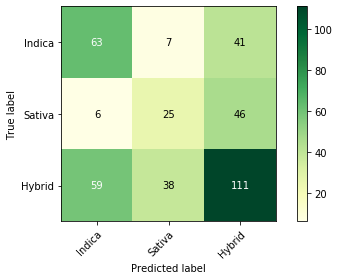

In [82]:
per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])

In [85]:
#Decision Tree with selected features (accuracy:0.525)
classifier2 = DecisionTreeClassifier()  
classifier2.fit(trainx, y_train) 
y_pred = classifier2.predict(testx)
y_score = classifier2.score(testx, y_test)
print('Accuracy: ', y_score)

Accuracy:  0.5252525252525253


In [87]:
# Compute the average precision score
micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

Micro-averaged precision score: 0.53
Macro-averaged precision score: 0.48


Per-class precision score: [0.56756757 0.28571429 0.59134615]
Precision Score: [0.53846154 0.33846154 0.57476636]
Recall Score: [0.56756757 0.28571429 0.59134615]
Accuracy Score: 0.5252525252525253
F1 Score: [0.55263158 0.30985915 0.58293839]
              precision    recall  f1-score   support

      indica       0.54      0.57      0.55       111
      satica       0.34      0.29      0.31        77
      hybrid       0.57      0.59      0.58       208

    accuracy                           0.53       396
   macro avg       0.48      0.48      0.48       396
weighted avg       0.52      0.53      0.52       396

Predicted    0   1    2  All
True                        
0           63   7   41  111
1            5  22   50   77
2           49  36  123  208
All        117  65  214  396


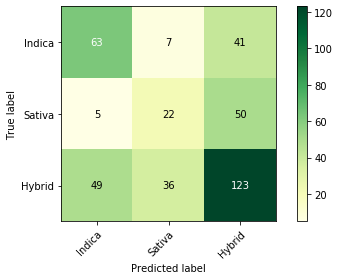

In [88]:
per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier1,df_train,df_test,y_train,y_test,n_classes)
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])

In [89]:
#Decision Tree with PCA (accuracy: 0.6162)
classifier1.fit(Xptrain, yptrain) 
y_pred = classifier1.predict(Xptest)
y_score = classifier1.score(Xptest, yptest)
print('Accuracy: ', y_score)

Accuracy:  0.6161616161616161


Micro-averaged precision score: 0.62
Macro-averaged precision score: 0.56
Per-class precision score: [0.63963964 0.32467532 0.71153846]
Precision Score: [0.57258065 0.3164557  0.76683938]
Recall Score: [0.63963964 0.32467532 0.71153846]
Accuracy Score: 0.6161616161616161
F1 Score: [0.60425532 0.32051282 0.73815461]
              precision    recall  f1-score   support

      indica       0.57      0.64      0.60       111
      satica       0.32      0.32      0.32        77
      hybrid       0.77      0.71      0.74       208

    accuracy                           0.62       396
   macro avg       0.55      0.56      0.55       396
weighted avg       0.62      0.62      0.62       396

Predicted    0   1    2  All
True                        
0           71  20   20  111
1           27  25   25   77
2           26  34  148  208
All        124  79  193  396


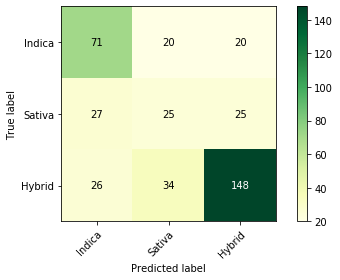

In [90]:
# Compute the average precision score
micro_precision = precision_score(y_pred, yptest, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, yptest, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, yptest, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(yptest,y_pred)
print(classification_report(yptest,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier1,df_train,df_test,y_train,y_test,n_classes)
plot_corr_matrix(yptest,y_pred,['Indica','Sativa','Hybrid'])

Mean Cross Validation Score: 53.32%
Mean Training Score: 68.72%
Mean Testing Score: 62.88%
Best Parameter Combination Found During Grid Search:
Accuracy is: 0.601010101010101
Micro-averaged precision score: 0.60
Macro-averaged precision score: 0.48
Per-class precision score: [0.6036036  0.         0.82211538]
Precision Score: [0.64423077 0.         0.58561644]
Recall Score: [0.6036036  0.         0.82211538]
Accuracy Score: 0.601010101010101
F1 Score: [0.62325581 0.         0.684     ]
              precision    recall  f1-score   support

      indica       0.64      0.60      0.62       111
      satica       0.00      0.00      0.00        77
      hybrid       0.59      0.82      0.68       208

    accuracy                           0.60       396
   macro avg       0.41      0.48      0.44       396
weighted avg       0.49      0.60      0.53       396

Predicted    0    2  All
True                    
0           67   44  111
1            0   77   77
2           37  171  208
All

/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


<Figure size 720x360 with 0 Axes>

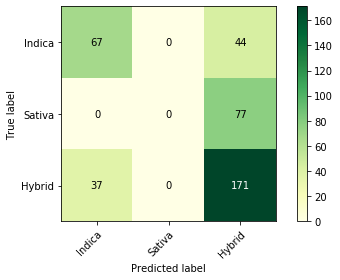

In [91]:
#Grid search Decision Tree: All features (criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2, accuracy: 0.6483)
model=DecisionTreeClassifier()
dt_cv_score=cross_val_score(model, scaled_data_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))

dt_param_grid = {
    'criterion':['entropy','gini'],
    'max_depth':[None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]   
}

dt_grid_search = GridSearchCV(model, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(scaled_data_train, y_train)

dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(scaled_data_test, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

classifier3 = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2)  
classifier3.fit(scaled_data_train, y_train) 

y_pred = classifier3.predict(scaled_data_test)

acc = accuracy_score(y_test,y_pred)
print("Accuracy is: {}".format(acc))

micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier3,scaled_data_train,scaled_data_test,y_train,y_test,n_classes)
plt.figure(figsize=(10,5))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])

Mean Cross Validation Score: 54.76%
Mean Training Score: 68.13%
Mean Testing Score: 62.88%
Best Parameter Combination Found During Grid Search:
Accuracy is: 0.601010101010101
Micro-averaged precision score: 0.60
Macro-averaged precision score: 0.48
Per-class precision score: [0.6036036  0.         0.82211538]
Precision Score: [0.64423077 0.         0.58561644]
Recall Score: [0.6036036  0.         0.82211538]
Accuracy Score: 0.601010101010101
F1 Score: [0.62325581 0.         0.684     ]
              precision    recall  f1-score   support

      indica       0.64      0.60      0.62       111
      sativa       0.00      0.00      0.00        77
      hybrid       0.59      0.82      0.68       208

    accuracy                           0.60       396
   macro avg       0.41      0.48      0.44       396
weighted avg       0.49      0.60      0.53       396

Predicted    0    2  All
True                    
0           67   44  111
1            0   77   77
2           37  171  208
All

/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


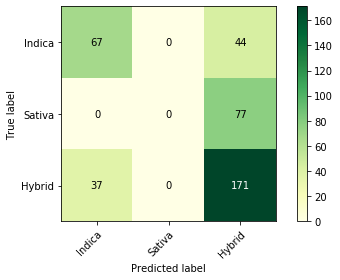

In [94]:
#Grid search decision tree with selected features (criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2, accuracy: 0.6483)
model=DecisionTreeClassifier()
dt_cv_score=cross_val_score(model, trainx, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))

dt_param_grid = {
    'criterion':['entropy','gini'],
    'max_depth':[None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]   
}

dt_grid_search = GridSearchCV(model, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(trainx, y_train)

dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(testx, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_
classifier3 = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2)  
classifier3.fit(trainx, y_train) 
y_pred = classifier3.predict(testx)
acc = accuracy_score(y_test,y_pred)
print("Accuracy is: {}".format(acc))

micro_precision = precision_score(y_pred, y_test, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, y_test, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, y_test, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','sativa','hybrid']))
# roc(classifier3,df_train,df_test,y_train,y_test,n_classes)
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])

Mean Cross Validation Score: 58.97%


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mean Training Score: 59.73%
Mean Testing Score: 61.87%
Best Parameter Combination Found During Grid Search:
Accuracy is: 0.5429292929292929
Micro-averaged precision score: 0.54
Macro-averaged precision score: 0.37
Per-class precision score: [0.13513514 0.         0.96153846]
Precision Score: [0.625      0.         0.53763441]
Recall Score: [0.13513514 0.         0.96153846]
Accuracy Score: 0.5429292929292929
F1 Score: [0.22222222 0.         0.68965517]
              precision    recall  f1-score   support

      indica       0.62      0.14      0.22       111
      satica       0.00      0.00      0.00        77
      hybrid       0.54      0.96      0.69       208

    accuracy                           0.54       396
   macro avg       0.39      0.37      0.30       396
weighted avg       0.46      0.54      0.42       396

Predicted   0    2  All
True                   
0          15   96  111
1           1   76   77
2           8  200  208
All        24  372  396


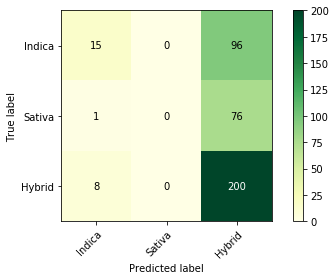

In [95]:
#Grid search decision tree with PCA (criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2, accuracy: 0.5581)
model=DecisionTreeClassifier()
dt_cv_score=cross_val_score(model, Xptrain, yptrain)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))

dt_param_grid = {
    'criterion':['entropy','gini'],
    'max_depth':[None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]   
}

dt_grid_search = GridSearchCV(model, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(Xptrain, yptrain)

dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(Xptest, yptest)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_
classifier3 = DecisionTreeClassifier(criterion='entropy',max_depth=3,min_samples_leaf=1,min_samples_split=2)  
classifier3.fit(Xptrain, yptrain) 
y_pred = classifier3.predict(Xptest)
acc = accuracy_score(yptest,y_pred)
print("Accuracy is: {}".format(acc))

micro_precision = precision_score(y_pred, yptest, average='micro')
print('Micro-averaged precision score: {0:0.2f}'.format(
      micro_precision))

macro_precision = precision_score(y_pred, yptest, average='macro')
print('Macro-averaged precision score: {0:0.2f}'.format(
      macro_precision))

per_class_precision = precision_score(y_pred, yptest, average=None)
print('Per-class precision score:', per_class_precision)
print_metrics(yptest,y_pred)
print(classification_report(yptest,y_pred,target_names=['indica','satica','hybrid']))
# roc(classifier3,df_train,df_test,y_train,y_test,n_classes)
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])


Precision Score: [0.54954955 0.32467532 0.52403846]
Recall Score: [0.47286822 0.36231884 0.55050505]
Accuracy Score: 0.49242424242424243
F1 Score: [0.50833333 0.34246575 0.53694581]
              precision    recall  f1-score   support

      indica       0.47      0.55      0.51       111
      satica       0.36      0.32      0.34        77
      hybrid       0.55      0.52      0.54       208

    accuracy                           0.49       396
   macro avg       0.46      0.47      0.46       396
weighted avg       0.49      0.49      0.49       396

Predicted    0   1    2  All
True                        
0           61   8   42  111
1            5  25   47   77
2           63  36  109  208
All        129  69  198  396


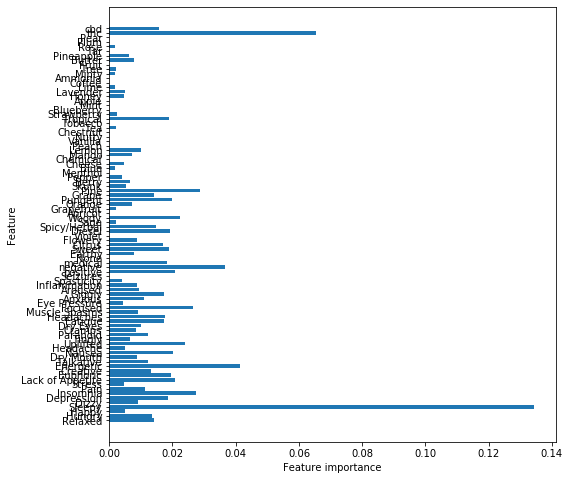

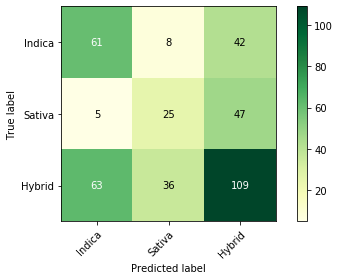

In [96]:
#Random Forest Baseline (accuracy: 0.49)
tree_clf = DecisionTreeClassifier() 
tree_clf.fit(scaled_data_train, y_train)
y_pred=tree_clf.predict(scaled_data_test)
# roc(tree_clf,scaled_data_train,scaled_data_test,y_train,y_test,n_classes)
plot_feature_importances(tree_clf, pd.DataFrame(X_train), X_test, y_train, y_test)
print_metrics(y_pred,y_test)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])




Precision Score: [0.73       0.75510204 0.46478873]
Recall Score: [0.61864407 0.7014218  0.61111111]
Accuracy Score: 0.645320197044335
F1 Score: [0.66972477 0.72727273 0.528     ]
              precision    recall  f1-score   support

      indica       0.62      0.73      0.67       200
      satica       0.70      0.76      0.73       196
      hybrid       0.61      0.46      0.53       213

    accuracy                           0.65       609
   macro avg       0.64      0.65      0.64       609
weighted avg       0.64      0.65      0.64       609

Predicted    0    1    2  All
True                         
0          146   23   31  200
1           16  148   32  196
2           74   40   99  213
All        236  211  162  609


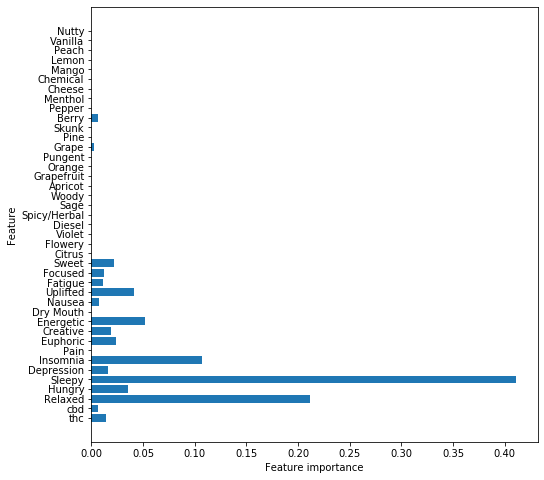

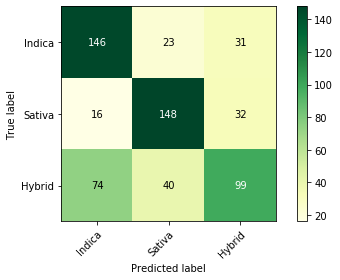

In [174]:
#Random Forest w Selected features (accuracy: 0.63)
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(trainx, y_train)
y_preds=tree_clf.predict(testx)
# roc(tree_clf,trainx,testx,y_train,y_test,n_classes)
plot_feature_importances(tree_clf, trainx,  X_test, y_train, y_test)
print_metrics(y_preds,y_test)
print(classification_report(y_test,y_preds,target_names=['indica','satica','hybrid']))
plot_corr_matrix(y_test,y_preds,['Indica','Sativa','Hybrid'])


Precision Score: [0.14414414 0.         0.98076923]
Recall Score: [0.69565217 0.         0.54986523]
Accuracy Score: 0.5555555555555556
F1 Score: [0.23880597 0.         0.70466321]
              precision    recall  f1-score   support

      indica       0.70      0.14      0.24       111
      satica       0.00      0.00      0.00        77
      hybrid       0.55      0.98      0.70       208

    accuracy                           0.56       396
   macro avg       0.42      0.37      0.31       396
weighted avg       0.48      0.56      0.44       396

Predicted   0  1    2  All
True                      
0          16  0   95  111
1           5  0   72   77
2           2  2  204  208
All        23  2  371  396


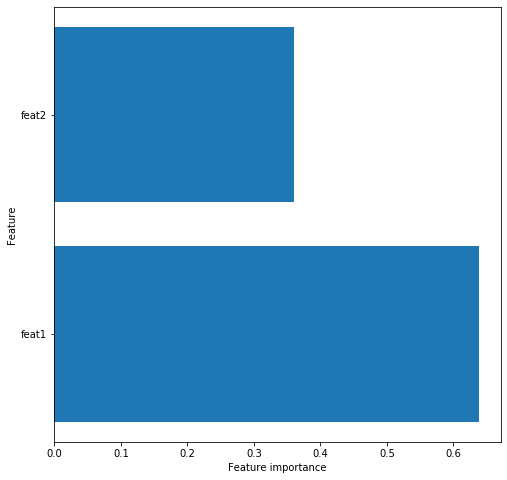

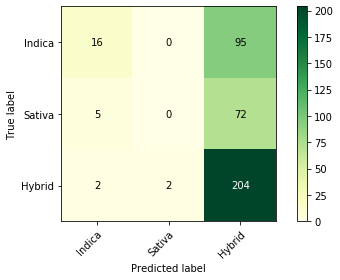

In [101]:
#Random forest with PCA (accuracy: 0.5262)
tree_clf = DecisionTreeClassifier(criterion = "gini", max_depth = 5) 
tree_clf.fit(Xptrain, yptrain)
y_preds=tree_clf.predict(Xptest)
# roc(tree_clf,df_train,df_test,y_train,y_test,n_classes)
plot_feature_importances(tree_clf, Xptrain, Xptest, yptrain, yptest)
print_metrics(y_preds,yptest)
print(classification_report(yptest,y_preds,target_names=['indica','satica','hybrid']))
plot_corr_matrix(y_test,y_preds,['Indica','Sativa','Hybrid'])

Training Score: 0.7538377192982456
Testing Score: 0.6929392446633826
Precision Score: [0.79       0.89285714 0.41784038]
Recall Score: [0.68103448 0.6916996  0.71774194]
Accuracy Score: 0.6929392446633826
F1 Score: [0.73148148 0.77951002 0.52818991]
              precision    recall  f1-score   support

      indica       0.68      0.79      0.73       200
      sativa       0.69      0.89      0.78       196
      hybrid       0.72      0.42      0.53       213

    accuracy                           0.69       609
   macro avg       0.70      0.70      0.68       609
weighted avg       0.70      0.69      0.68       609

Predicted    0    1    2  All
True                         
0          158   18   24  200
1           10  175   11  196
2           64   60   89  213
All        232  253  124  609


<Figure size 720x360 with 0 Axes>

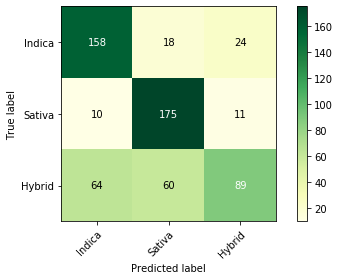

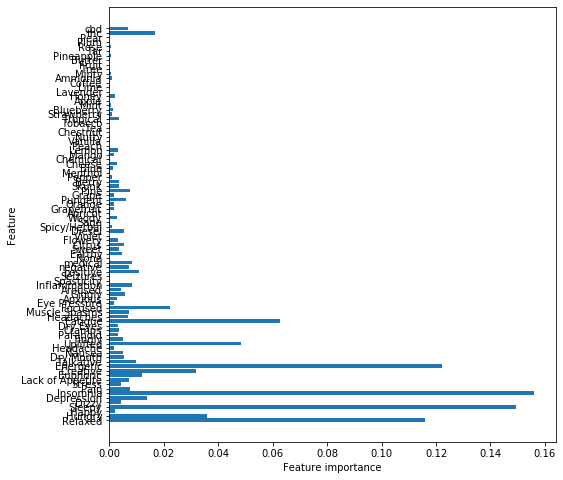

In [175]:
#forest with different parameters (accuracy: 0.60)
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(scaled_data_train, y_train)
y_pred=forest.predict(scaled_data_test)
train_score=forest.score(scaled_data_train,y_train)
test_score=forest.score(scaled_data_test,y_test)
print('Training Score: {}'.format(train_score))
print('Testing Score: {}'.format(test_score))
print_metrics(y_pred,y_test)
print(classification_report(y_test,y_pred,target_names=['indica','sativa','hybrid']))
plt.figure(figsize=(10,5))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])
plot_feature_importances(forest,pd.DataFrame(X_train),X_test, y_train, y_test)

Training Score: 0.6621735467565291
Testing Score: 0.6060606060606061
              precision    recall  f1-score   support

      indica       0.66      0.55      0.60       111
      satica       0.71      0.06      0.12        77
      hybrid       0.59      0.84      0.69       208

    accuracy                           0.61       396
   macro avg       0.65      0.48      0.47       396
weighted avg       0.63      0.61      0.55       396

Precision Score: [0.54954955 0.06493506 0.83653846]
Recall Score: [0.65591398 0.71428571 0.58783784]
Accuracy Score: 0.6060606060606061
F1 Score: [0.59803922 0.11904762 0.69047619]
Predicted   0  1    2  All
True                      
0          61  0   50  111
1           0  5   72   77
2          32  2  174  208
All        93  7  296  396


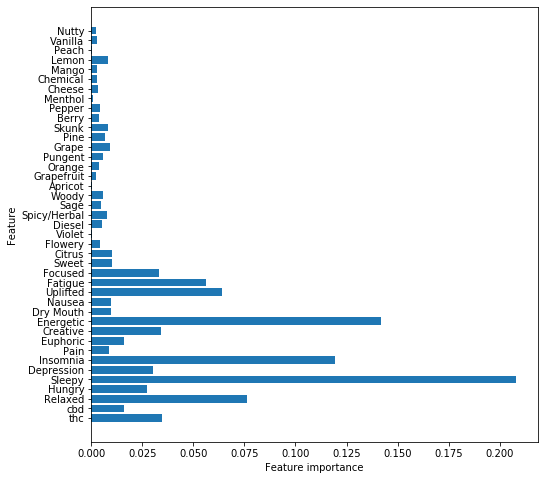

<Figure size 720x432 with 0 Axes>

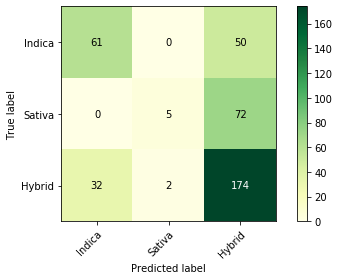

In [118]:
#forest with different parameters and selected features (accuracy: 0.6715)
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(trainx, y_train)
y_pred=forest.predict(testx)
train_score=forest.score(trainx,y_train)
test_score=forest.score(testx,y_test)
print('Training Score: {}'.format(train_score))
print('Testing Score: {}'.format(test_score))
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
print_metrics(y_pred,y_test)
plot_feature_importances(forest,pd.DataFrame(trainx), X_test, y_train, y_test)
plt.figure(figsize=(10,6))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])

Training Score: 0.5838247683235046
Testing Score: 0.5681818181818182
              precision    recall  f1-score   support

      indica       0.79      0.20      0.32       111
      sativa       0.00      0.00      0.00        77
      hybrid       0.55      0.98      0.70       208

    accuracy                           0.57       396
   macro avg       0.45      0.39      0.34       396
weighted avg       0.51      0.57      0.46       396

Precision Score: [0.1981982  0.         0.97596154]
Recall Score: [0.78571429 0.         0.55163043]
Accuracy Score: 0.5681818181818182
F1 Score: [0.31654676 0.         0.70486111]
Predicted   0    2  All
True                   
0          22   89  111
1           1   76   77
2           5  203  208
All        28  368  396


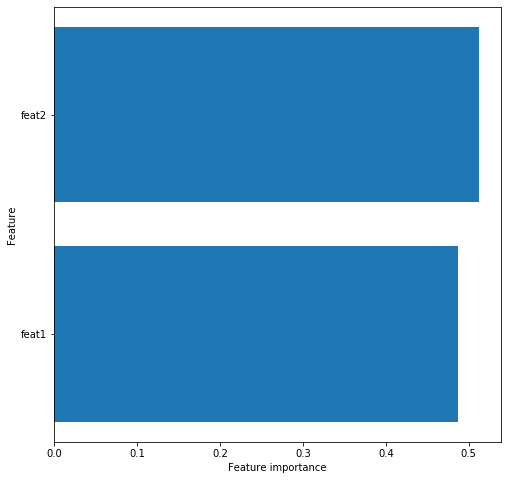

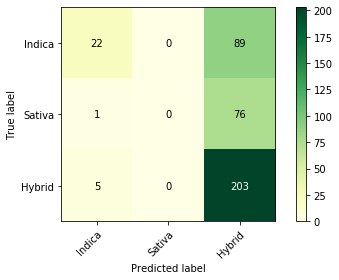

In [119]:
#forest with different parameters and PCA (accuracy: 0.5681)
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(Xptrain, yptrain)
y_pred=forest.predict(Xptest)
train_score=forest.score(Xptrain,yptrain)
test_score=forest.score(Xptest,yptest)
print('Training Score: {}'.format(train_score))
print('Testing Score: {}'.format(test_score))
print(classification_report(yptest,y_pred,target_names=['indica','sativa','hybrid']))
print_metrics(y_pred,yptest)
plot_feature_importances(forest,pd.DataFrame(Xptrain), Xptest, yptrain, yptest)
plot_corr_matrix(yptest,y_pred,['Indica','Sativa','Hybrid'])


Mean Cross Validation Score: 60.06%


/Users/stephaniekendall/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Mean Training Score: 64.71%
Mean Testing Score: 61.11%
Best Parameter Combination Found During Grid Search:
Precision Score: [0.65      0.8       0.6048951]
Recall Score: [0.58558559 0.1038961  0.83173077]
Accuracy Score: 0.6212121212121212
F1 Score: [0.61611374 0.18390805 0.70040486]
              precision    recall  f1-score   support

      indica       0.65      0.59      0.62       111
      satica       0.80      0.10      0.18        77
      hybrid       0.60      0.83      0.70       208

    accuracy                           0.62       396
   macro avg       0.68      0.51      0.50       396
weighted avg       0.66      0.62      0.58       396

Predicted    0   1    2  All
True                        
0           65   0   46  111
1            2   8   67   77
2           33   2  173  208
All        100  10  286  396
Training Score:  0.6613310867733783
Testing Score:  0.6212121212121212


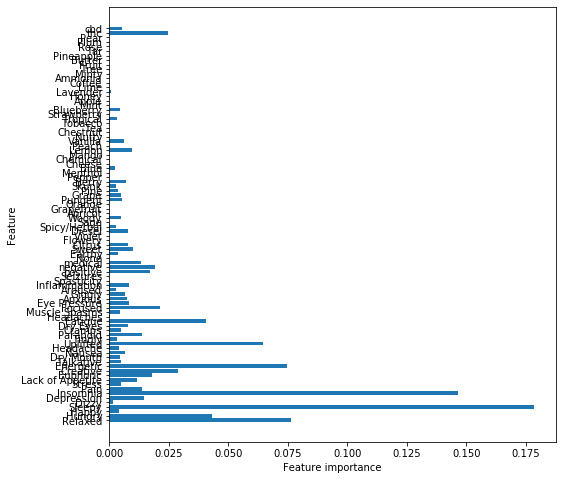

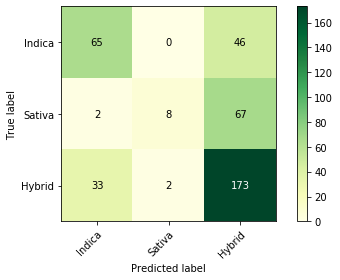

In [120]:
#Grid search forest (criterion='gini', max_depth=6,min_samples_leaf=5,min_samples_split=5,n_estimators=8, accuracy: 0.6512)
dt_clf=RandomForestClassifier()
dt_cv_score=cross_val_score(dt_clf, scaled_data_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'n_estimators':[1,2,3,4,5,6,7,8,9],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(scaled_data_train, y_train)
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(scaled_data_test, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

forest3 = RandomForestClassifier(criterion='gini', max_depth=6,min_samples_leaf=5,min_samples_split=5,n_estimators=8)
forest3.fit(scaled_data_train, y_train)
y_pred=forest3.predict(scaled_data_test)
y_pred=forest3.predict(scaled_data_test)
print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
plot_feature_importances(forest3,pd.DataFrame(X_train),X_test, y_train, y_test)
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])
print("Training Score: ",forest3.score(scaled_data_train,y_train))
print("Testing Score: ",forest3.score(scaled_data_test,y_test))



In [180]:
#Grid Search Forest selected features (criterion='gini', max_depth=4,min_samples_leaf=5,min_samples_split=10,n_estimators=5 accuracy: 0.6541)
dt_clf=RandomForestClassifier()
dt_cv_score=cross_val_score(dt_clf, X_train, y_train)
meandtcv=dt_cv_score.mean()
print("Mean Cross Validation Score: {:.4}%".format(meandtcv * 100))
dt_grid_search = GridSearchCV(dt_clf, dt_param_grid, cv=10, return_train_score=True)
dt_grid_search.fit(X_train, y_train)
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])
dt_gs_testing_score = dt_grid_search.score(df_test, y_test)

print("Mean Training Score: {:.4}%".format(dt_gs_training_score * 100))
print("Mean Testing Score: {:.4}%".format(dt_gs_testing_score * 100))
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_
forest3 = RandomForestClassifier(criterion='gini', max_depth=4,min_samples_leaf=5,min_samples_split=10,n_estimators=5)
forest3.fit(scaled_data_train, y_train)
y_pred=forest3.predict(scaled_data_test)
y_pred=forest3.predict(scaled_data_test)
print_metrics(y_test,y_pred)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
plot_feature_importances(forest3,pd.DataFrame(X_train), X_test, y_train, y_test)
plt.figure(figsize=(10,5))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])
plt.savefig('Visualizations/SelectedForestGridSearch.png')
print("Training Score: ",forest3.score(scaled_data_train,y_train))
print("Testing Score: ",forest3.score(scaled_data_test,y_test))

Mean Cross Validation Score: 75.17%


ValueError: Invalid parameter n_neighbors for estimator RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False). Check the list of available parameters with `estimator.get_params().keys()`.

              precision    recall  f1-score   support

      indica       0.71      0.74      0.73       200
      satica       0.87      0.73      0.80       196
      hybrid       0.63      0.70      0.66       213

    accuracy                           0.72       609
   macro avg       0.74      0.72      0.73       609
weighted avg       0.74      0.72      0.73       609

Predicted    0    1    2  All
True                         
0          148    8   44  200
1            8  144   44  196
2           51   13  149  213
All        207  165  237  609


FileNotFoundError: [Errno 2] No such file or directory: 'Visualizations/SVMmtx.png'

<Figure size 720x432 with 0 Axes>

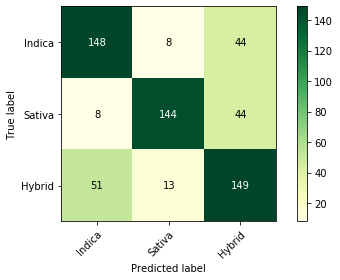

In [181]:
#SVM Baseline (accuracy: 0.6715)
clf = svm.SVC(kernel='linear')
clf.fit(scaled_data_train, y_train)
y_pred=clf.predict(scaled_data_test)
print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
plt.figure(figsize=(10,6))
plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])
plt.savefig('Visualizations/SVMmtx.png')
print_metrics(y_test,y_pred)

In [ ]:
#SVM PCA (accuracy: 0.5436)
clf = svm.SVC(kernel='linear')
clf.fit(Xptrain, yptrain)
y_pred=clf.predict(Xptest)
print(classification_report(yptest,y_pred,target_names=['indica','satica','hybrid']))
plt.figure(figsize=(10,6))
plot_corr_matrix(yptest,y_pred,['Indica','Sativa','Hybrid'])
plt.savefig('Visualizations/SVMPCAmtx.png')
print_metrics(yptest,y_pred)

In [184]:
#Naive Bayes Baseline
from sklearn.naive_bayes import BernoulliNB
clf=BernoulliNB()
clf.fit(scaled_data_train, y_train)
y_pred=clf.predict(scaled_data_test)
print(classification_report(y_test,y_pred,target_names=['indica','sativa','hybrid']))
plot_corr_matrix(scaled_data_train,y_train,['Indica','Sativa','Hybrid'])

# clf=GaussianNB()
# clf.fit(scaled_data_train, y_train)
# y_pred=clf.predict(scaled_data_test)
# print(classification_report(y_test,y_pred,target_names=['indica','satica','hybrid']))
# plot_corr_matrix(y_test,y_pred,['Indica','Sativa','Hybrid'])
# scaled_data_train=pd.DataFrame(scaled_data_train)
# scaled_data_test=pd.DataFrame(scaled_data_test)
# print_metrics(y_test,y_pred)

              precision    recall  f1-score   support

      indica       0.71      0.75      0.73       200
      sativa       0.77      0.82      0.80       196
      hybrid       0.66      0.60      0.63       213

    accuracy                           0.72       609
   macro avg       0.72      0.72      0.72       609
weighted avg       0.72      0.72      0.72       609



TypeError: 'int' object is not iterable